# Proejct 3: Supervised Learning: Cars4U Project

The project goal is to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


## Objective

* Explore and visualize the dataset.
* Build a linear regression model to predict the prices of used cars.
* Generate a set of insights and recommendations that will help the business.

## Data Dictionary 
* S.No. : Serial Number
* Name : Name of the car which includes Brand name and Model name
* Location : The location in which the car is being sold or is available for purchase Cities
* Year : Manufacturing year of the car
* Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner : Type of ownership
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
* Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Import Libraries

In [1]:
#Import the necessary libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Import Linear Regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cross validation (train - test split)
from sklearn.model_selection import train_test_split

# Additional - Optional 
import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style='darkgrid')

## Load and explore the data

In [2]:
# Load the data into pandas dataframe
data = pd.read_csv("used_cars_data.csv")

# Make another copy of data
df = data.copy()

## Overview of the data 

In [3]:
df.shape

(7253, 14)

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,NaN,17.74


In [5]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,NaN,nan
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,NaN,nan
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,NaN,nan
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00,NaN,nan
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00,NaN,nan


* There does not appear to be a summary row
* The "S.No" column appears redundant and can be dropped
* A fair amount of data preprocessing will need to be done before we can perform any EDA or model building

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


* There are 9 object variables which will need to be converted to category
* There 7253 total rows
* Columns 8 through 13 appear to be missing values

In [7]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

* New_Price is missing greater than 50% of it's entries. I will need to examine close to discover if this variable should be dropped.
* Price is missing 1234 values
* Seats is missing 53 values
* Power and Engine are missing 46 values each
* Mileage is missing 2 values

In [8]:
# looking at which columns have the most missing values
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

* Categorical variables with a manageable number of unique values can be split into dummies for model buiilding. Other's such as Name will need to be feature engineered.  

In [9]:
df.drop(['S.No.'],axis=1,inplace=True) # drop column S.No. because it's redundant

In [10]:
df.info() # check to see if it dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


### Convert object variables to categories

In [11]:
# Converting object type column to category type
df['Name'] = df['Name'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   object  
 8   Engine             7207 non-null   object  
 9   Power              7207 non-null   object  
 10  Seats              7200 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              6019 non-null   float64 
dtypes: category(5), float64(2), int64(2), object(4)
memory usage: 592.8+ KB


In [12]:
# take a look and basic descriptive statistics of the numerical variables in the dataset

df.describe()

,Year,Kilometers_Driven,Seats,Price
count,"7,253.00","7,253.00","7,200.00","6,019.00"
mean,"2,013.37","58,699.06",5.28,9.48
std,3.25,"84,427.72",0.81,11.19
min,"1,996.00",171.00,0.00,0.44
25%,"2,011.00","34,000.00",5.00,3.50
50%,"2,014.00","53,416.00",5.00,5.64
75%,"2,016.00","73,000.00",5.00,9.95
max,"2,019.00","6,500,000.00",10.00,160.00


## Split Name into two columns

In [13]:
# create new data frame by spliting Name column on first space and converting to string

name_split = df["Name"].str.split(" ", n = 1, expand = True) 
name_split.head()

,0,1
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic


### Drop Name column and add two new columns for Brand_Name and Model_Name

In [14]:
df.drop(['Name'], axis=1, inplace=True)
df["Brand_Name"]= name_split[0]   
df["Model_Name"]= name_split[1]

del name_split  # delete dataframe since it's not need and can free up memory

In [15]:
# check to see if successful

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand_Name,Model_Name
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


## Process Power variable by dropping the 'bhp' and converting to float

In [16]:
# create new data frame by spliting Power column on first space and converting to string

power_split = df["Power"].str.split(" ", n = 1, expand = True) 

# drop power column and replace with new value from power_split dataframe
df.drop(['Power'], axis=1, inplace=True)
df['Power']= power_split[0]  

#convert Power column to numeric and view info to confirm
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Mileage            7251 non-null   object  
 7   Engine             7207 non-null   object  
 8   Seats              7200 non-null   float64 
 9   New_Price          1006 non-null   object  
 10  Price              6019 non-null   float64 
 11  Brand_Name         7253 non-null   object  
 12  Model_Name         7253 non-null   object  
 13  Power              7078 non-null   float64 
dtypes: category(4), float64(3), int64(2), object(5)
memory usage: 596.0+ KB


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price,Brand_Name,Model_Name,Power
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,5.00,NaN,1.75,Maruti,Wagon R LXI CNG,58.16
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,5.00,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,126.20
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,5.00,8.61 Lakh,4.50,Honda,Jazz V,88.70
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,7.00,NaN,6.00,Maruti,Ertiga VDI,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,5.00,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,140.80


## Process Mileage variable by dropping the unecessary descriptive data and converting to float


In [17]:
# create new data frame by spliting Mileage column on first space and converting to string

mileage_split = df["Mileage"].str.split(" ", n = 1, expand = True) 

# drop Mileage column and replace with new value from mileage_split dataframe
df.drop(['Mileage'], axis=1, inplace=True)
df['Mileage']= mileage_split[0]  

#convert Mileage column to numeric and view info to confirm
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Engine             7207 non-null   object  
 7   Seats              7200 non-null   float64 
 8   New_Price          1006 non-null   object  
 9   Price              6019 non-null   float64 
 10  Brand_Name         7253 non-null   object  
 11  Model_Name         7253 non-null   object  
 12  Power              7078 non-null   float64 
 13  Mileage            7251 non-null   float64 
dtypes: category(4), float64(4), int64(2), object(4)
memory usage: 596.0+ KB


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,New_Price,Price,Brand_Name,Model_Name,Power,Mileage
0,Mumbai,2010,72000,CNG,Manual,First,998 CC,5.00,NaN,1.75,Maruti,Wagon R LXI CNG,58.16,26.60
1,Pune,2015,41000,Diesel,Manual,First,1582 CC,5.00,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,126.20,19.67
2,Chennai,2011,46000,Petrol,Manual,First,1199 CC,5.00,8.61 Lakh,4.50,Honda,Jazz V,88.70,18.20
3,Chennai,2012,87000,Diesel,Manual,First,1248 CC,7.00,NaN,6.00,Maruti,Ertiga VDI,88.76,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,5.00,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,140.80,15.20


In [18]:
#convert New_Price column to numeric and convert missing values to NaN 
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df.info() # view info to confirm
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Engine             7207 non-null   object  
 7   Seats              7200 non-null   float64 
 8   New_Price          1006 non-null   object  
 9   Price              6019 non-null   float64 
 10  Brand_Name         7253 non-null   object  
 11  Model_Name         7253 non-null   object  
 12  Power              7078 non-null   float64 
 13  Mileage            7251 non-null   float64 
dtypes: category(4), float64(4), int64(2), object(4)
memory usage: 596.0+ KB


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,New_Price,Price,Brand_Name,Model_Name,Power,Mileage
0,Mumbai,2010,72000,CNG,Manual,First,998 CC,5.00,NaN,1.75,Maruti,Wagon R LXI CNG,58.16,26.60
1,Pune,2015,41000,Diesel,Manual,First,1582 CC,5.00,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,126.20,19.67
2,Chennai,2011,46000,Petrol,Manual,First,1199 CC,5.00,8.61 Lakh,4.50,Honda,Jazz V,88.70,18.20
3,Chennai,2012,87000,Diesel,Manual,First,1248 CC,7.00,NaN,6.00,Maruti,Ertiga VDI,88.76,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,5.00,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,140.80,15.20


## Convert Engine variable to float and remove unnecessary descriptive data 

In [19]:
# Convert Engine variable to float and remove unnecessary descriptive data 
# use function developed in lesson

def engine_to_num(Engine):
    """In the engine column I'm replacing the terminal 'CC' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(Engine, str):
        return float(Engine.replace('CC', ''))
    else:
        return np.nan

# Here, the keys of the dictionary are the column names and the values are 
# the function that I'll use to replace that column's values. I now don't
# have to worry about mixing up column names and processing functions.
col_transforms = {
   'Engine': engine_to_num,
}

# k is the key, so the column name here
# v is the value, which a function in this case and is
#     either `height_to_num` or `weight_to_num`
for k,v in col_transforms.items():
    df[k] = df[k].map(v)

    
df.head() # check to confirm function executed as intended

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,New_Price,Price,Brand_Name,Model_Name,Power,Mileage
0,Mumbai,2010,72000,CNG,Manual,First,998.00,5.00,NaN,1.75,Maruti,Wagon R LXI CNG,58.16,26.60
1,Pune,2015,41000,Diesel,Manual,First,"1,582.00",5.00,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,126.20,19.67
2,Chennai,2011,46000,Petrol,Manual,First,"1,199.00",5.00,8.61 Lakh,4.50,Honda,Jazz V,88.70,18.20
3,Chennai,2012,87000,Diesel,Manual,First,"1,248.00",7.00,NaN,6.00,Maruti,Ertiga VDI,88.76,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,Second,"1,968.00",5.00,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic,140.80,15.20


## Drop New_Price Column because < 50%

In [20]:
df.drop(['New_Price'],axis=1,inplace=True) # drop column New_Price because it's missing > 50% if it's values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Engine             7207 non-null   float64 
 7   Seats              7200 non-null   float64 
 8   Price              6019 non-null   float64 
 9   Brand_Name         7253 non-null   object  
 10  Model_Name         7253 non-null   object  
 11  Power              7078 non-null   float64 
 12  Mileage            7251 non-null   float64 
dtypes: category(4), float64(5), int64(2), object(2)
memory usage: 539.3+ KB


## Convert remaining objects to categories

In [21]:
# Converting Brand_Name and Model_Name object type column to category type
df['Brand_Name'] = df['Brand_Name'].astype('category')
df['Model_Name'] = df['Model_Name'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   category
 6   Engine             7207 non-null   float64 
 7   Seats              7200 non-null   float64 
 8   Price              6019 non-null   float64 
 9   Brand_Name         7253 non-null   category
 10  Model_Name         7253 non-null   category
 11  Power              7078 non-null   float64 
 12  Mileage            7251 non-null   float64 
dtypes: category(6), float64(5), int64(2)
memory usage: 544.7 KB


## Convert Owner_Type to Int for better modeling

In [22]:
# this will negate the need to creat dummies later on and reduce the total number of columns required.

df['Owner_Type'] = df['Owner_Type'].replace(['First'], '1').replace(['Second'], '2').replace(['Third'], '3').replace(['Fourth & Above'], '4')
df['Owner_Type'].head()

0    1
1    1
2    1
3    1
4    2
Name: Owner_Type, dtype: category
Categories (4, object): ['1', '4', '2', '3']

In [23]:
df['Owner_Type'] = df['Owner_Type'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   int32   
 6   Engine             7207 non-null   float64 
 7   Seats              7200 non-null   float64 
 8   Price              6019 non-null   float64 
 9   Brand_Name         7253 non-null   category
 10  Model_Name         7253 non-null   category
 11  Power              7078 non-null   float64 
 12  Mileage            7251 non-null   float64 
dtypes: category(5), float64(5), int32(1), int64(2)
memory usage: 565.7 KB


* This will negate the need to creat dummies later on and reduce the total number of columns required.
* This should produce the same results in the linear regression as dummies 

### Observations

* All values have been converted and are ready for the next stage of processing

# Process Missing Values

In [24]:
df.isnull().sum().sort_values(ascending=False) # observe missing values

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Model_Name              0
Brand_Name              0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
dtype: int64

* We need to fill in missing values
* There are 1234 missing values for Price, 175 in Mileage, 175 in Power, 53 in Seats, and 46 in Engine

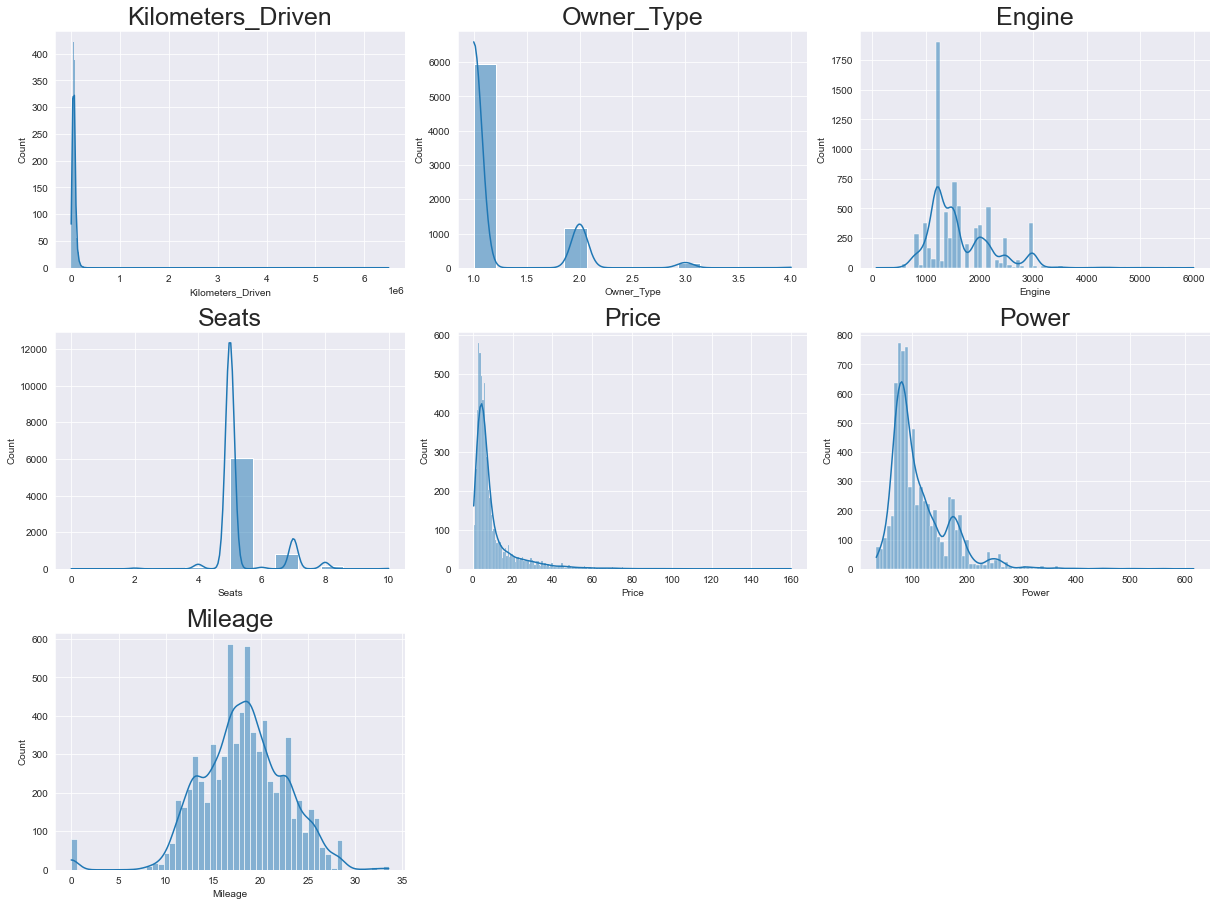

In [25]:
# lets plot histogram of all numerical variables to check for normality vs. skewness

all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove("Year")
plt.figure(figsize=(17, 75))

for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    #plt.hist(data[all_col[i]])
    sns.histplot(df[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

* There is a heavy left skew in Price, it may make sense to take the median grouped by Brand_Name to fill in missing values
* Power and Mileage are slightly skewed we can likely replace with median values
* It would make sense that the number of Seats would vary by vehicle type. I will groupby number of Seats by Brand_Name and take the median for each brand to fill in missing values

In [26]:
#Replace missing values with median grouped by Brand_Name for increased relevance

df['Price'] = df['Price'].fillna(df.groupby('Brand_Name')['Price'].transform('median')) 
df['Power'] = df['Power'].fillna(df.groupby('Brand_Name')['Power'].transform('median'))
df['Mileage'] = df['Mileage'].fillna(df.groupby('Brand_Name')['Mileage'].transform('median'))
df['Seats'] = df['Seats'].fillna(df.groupby('Brand_Name')['Seats'].transform('median'))
df['Engine'] = df['Engine'].fillna(df.groupby('Brand_Name')['Engine'].transform('median'))


df.isnull().sum().sort_values(ascending=False) # check for remaining missing values

Power                2
Price                2
Mileage              0
Model_Name           0
Brand_Name           0
Seats                0
Engine               0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
Location             0
dtype: int64

* Most null values have been filled
* There are a few remaining

## Look for remaining rows with missing values

In [27]:
df[df['Power'].isna()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand_Name,Model_Name,Power,Mileage
915,Pune,2008,103000,Diesel,Automatic,2,799.00,2.00,3.00,Smart,Fortwo CDI AT,nan,0.00
6216,Pune,1996,65000,Diesel,Manual,2,"1,995.00",5.00,nan,Hindustan,Motors Contessa 2.0 DSL,nan,14.10


In [28]:
df[df['Price'].isna()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand_Name,Model_Name,Power,Mileage
6216,Pune,1996,65000,Diesel,Manual,2,"1,995.00",5.00,nan,Hindustan,Motors Contessa 2.0 DSL,nan,14.10
7067,Hyderabad,2005,50000,Petrol,Manual,2,"1,389.00",5.00,nan,OpelCorsa,1.4Gsi,88.00,14.20


* There are 3 rows that accourt for the remaining missing values (915, 6216, 7067)
* One strategy is to delete these rows however, there might be a tiny amount of signal coming from the other values in the row
* I can replace the missing values with medians from the entire column

In [29]:
# This function will replace any remaining missing values in every column with its median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Seats                0
Price                0
Brand_Name           0
Model_Name           0
Power                0
Mileage              0
dtype: int64

* There are no missing values remaining

In [30]:
# observe count by Brand_Name
df['Brand_Name'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
ISUZU               3
Force               3
Isuzu               2
Bentley             2
Lamborghini         1
Hindustan           1
OpelCorsa           1
Smart               1
Ambassador          1
Name: Brand_Name, dtype: int64

* ISUZU and Isuzu need to be fixed
* Bentley, Lamborghini, Hindustan, OpelCorsa, Smart; Ambassador have only one count.

In [31]:
# replace ISUZU with Isuzu
df['Brand_Name'] = df['Brand_Name'].replace(['ISUZU'], 'Isuzu')


  # Exploratory Data Analysis      

In [32]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand_Name,Model_Name,Power,Mileage
0,Mumbai,2010,72000,CNG,Manual,1,998.00,5.00,1.75,Maruti,Wagon R LXI CNG,58.16,26.60
1,Pune,2015,41000,Diesel,Manual,1,"1,582.00",5.00,12.50,Hyundai,Creta 1.6 CRDi SX Option,126.20,19.67
2,Chennai,2011,46000,Petrol,Manual,1,"1,199.00",5.00,4.50,Honda,Jazz V,88.70,18.20
3,Chennai,2012,87000,Diesel,Manual,1,"1,248.00",7.00,6.00,Maruti,Ertiga VDI,88.76,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,2,"1,968.00",5.00,17.74,Audi,A4 New 2.0 TDI Multitronic,140.80,15.20


In [33]:
df.shape

(7253, 13)

In [34]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # to display numbers in digits
df.describe()

,Year,Kilometers_Driven,Owner_Type,Engine,Seats,Price,Power,Mileage
count,7253.00,7253.00,7253.00,7253.00,7253.00,7253.00,7253.00,7253.00
mean,2013.37,58699.06,1.20,1616.12,5.28,9.25,112.46,18.14
std,3.25,84427.72,0.46,594.43,0.81,10.63,53.21,4.56
min,1996.00,171.00,1.00,72.00,0.00,0.44,34.20,0.00
25%,2011.00,34000.00,1.00,1198.00,5.00,3.75,75.00,15.17
50%,2014.00,53416.00,1.00,1493.00,5.00,5.35,93.70,18.16
75%,2016.00,73000.00,1.00,1968.00,5.00,9.89,138.03,21.10
max,2019.00,6500000.00,4.00,5998.00,10.00,160.00,616.00,33.54


**Observations
* Year: min 1996, max 2019, median 2014
* Kilometers_Driven: appears highly skewed, min 171, max 6,500,000, std 84,427.72, there appears to be outliers
* Owner_Type: most cars are owned by the first owner (1)
* Engine: There is a wide variation which may indicate outliers
* Seats: Mean seats is 5.0, min 0, max 10 indicate outliers
* Price: min of 0.44 and max of 169 indicate outliers
* Power: mean 112 and median 93.7, min 34.2 and max 616.00 indicate outliers
* Mileage: mean and mdeian are are similar indicating potential normal distribution, min 0 and max 33.5 indicate outliers

In [35]:
# take a look at the categorical values in the dataset

df.describe(include='category')

,Location,Fuel_Type,Transmission,Brand_Name,Model_Name
count,7253,7253,7253,7253,7253
unique,11,5,2,32,2041
top,Mumbai,Diesel,Manual,Maruti,XUV500 W8 2WD
freq,949,3852,5204,1444,55


## Define function to create combination graph of boxplot and histogram

In [36]:
# using function from earlier lesson to check skewness using combination graph of boxplot and histogram 
# this is a useful tool for doing univariate analysis of numerical values to study central tendency and dispersion

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=True, ax=ax_hist2, bins=bins, pallette='winter') if bins else sns.histplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# Univariate Analysis

## Numerical Variables

### Observe Year

### Observe Price

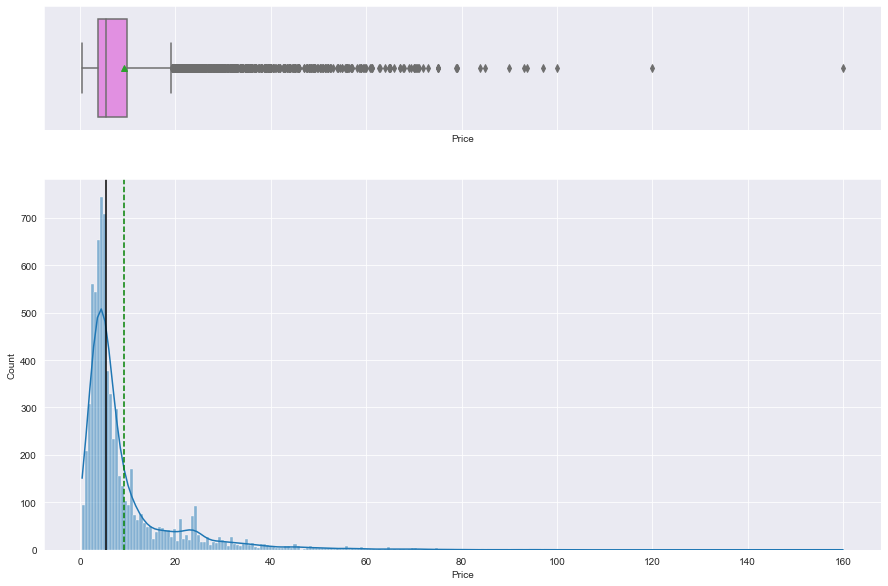

In [37]:
histogram_boxplot(df.Price)

* High variability in price with long tail and many outliers to higher end

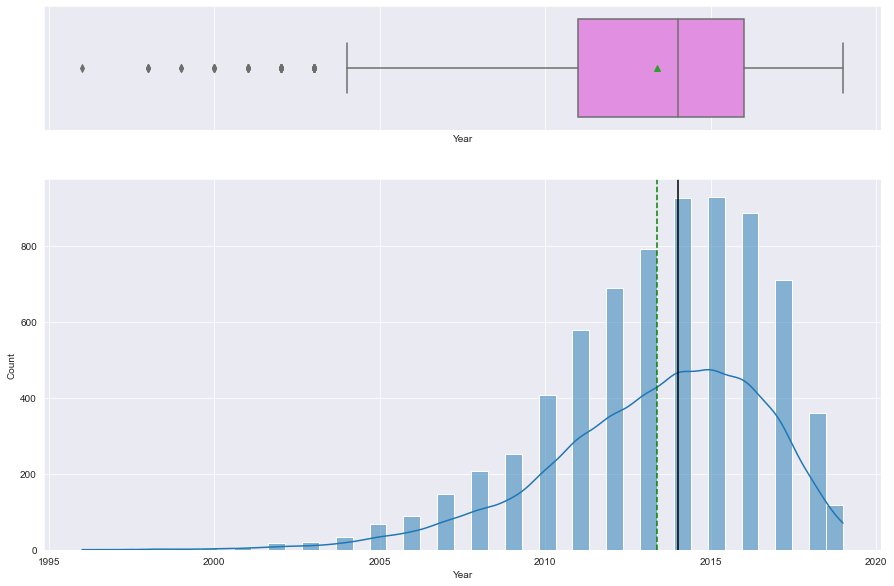

In [38]:
histogram_boxplot(df.Year)

* outliers in the lower range
* Mean 2013

### Observe Engine

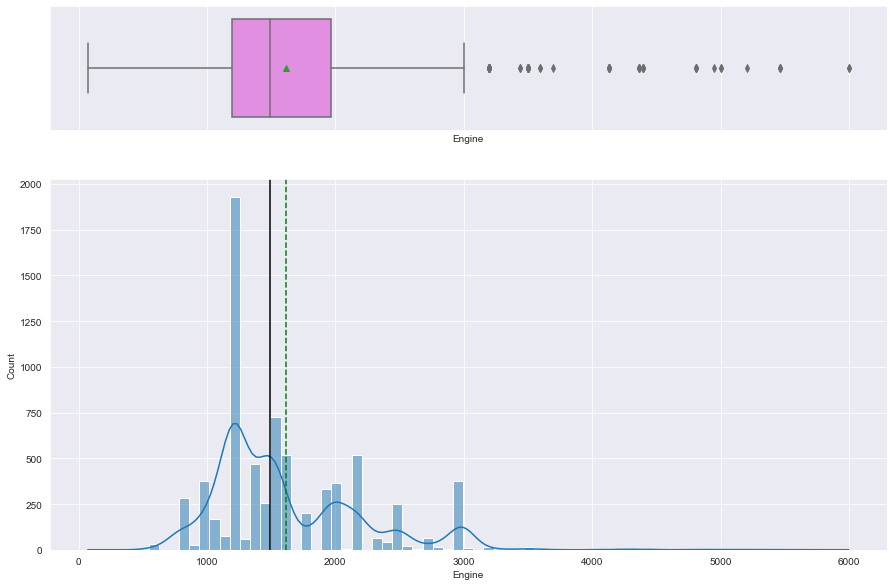

In [39]:
histogram_boxplot(df.Engine)

* Long tail right skew with many outliers

### Observe Power

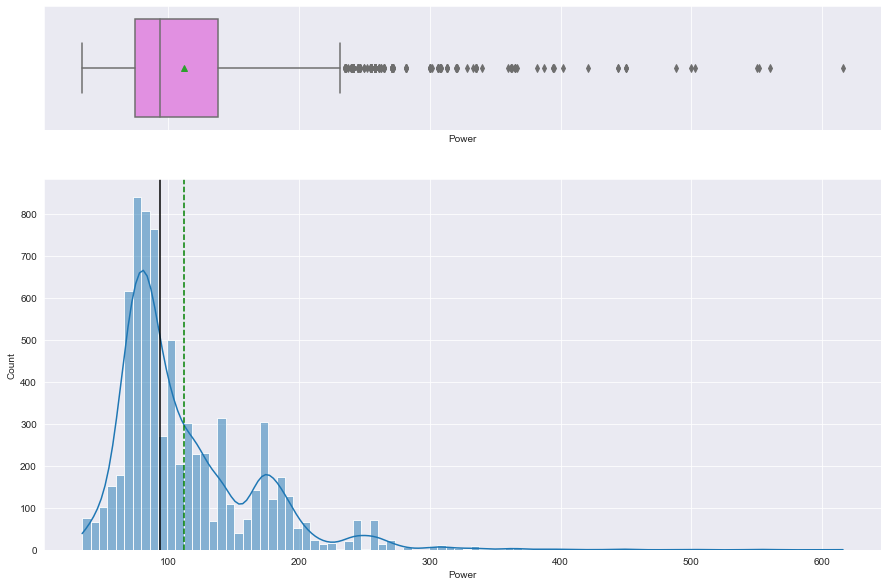

In [40]:
histogram_boxplot(df.Power)

* Right skewed with many ouliers

### Observe Kilometers_Driven

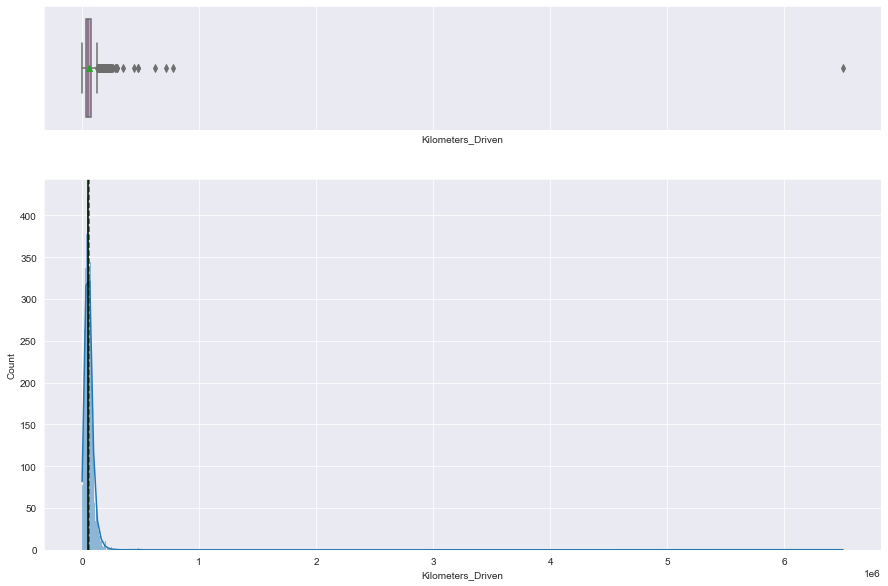

In [41]:
histogram_boxplot(df.Kilometers_Driven)

### Observe Owner_Type

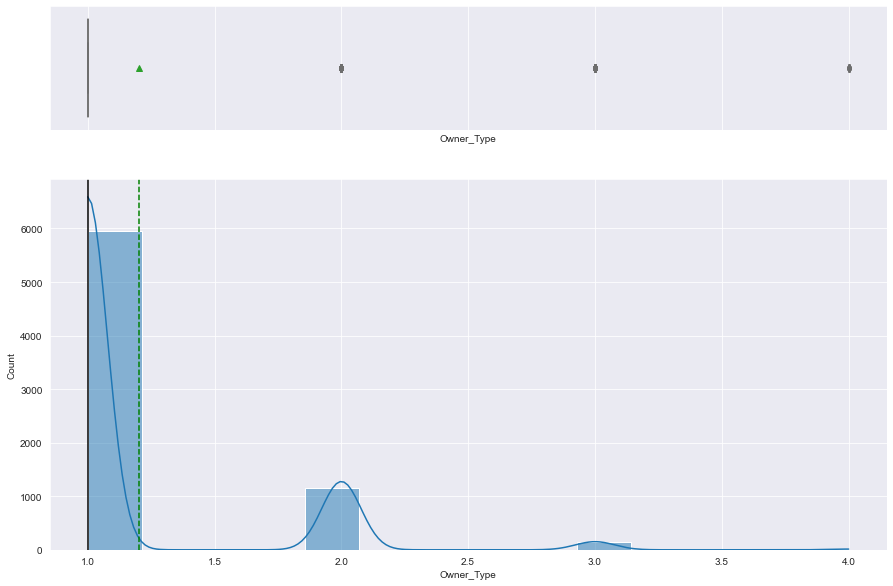

In [42]:
histogram_boxplot(df.Owner_Type)

* Heavy right skew
* Median value is 1 year indicating the first owner
* Outliers in the higher numbers

* Massive outlier is skewing the results

### Observe Seats

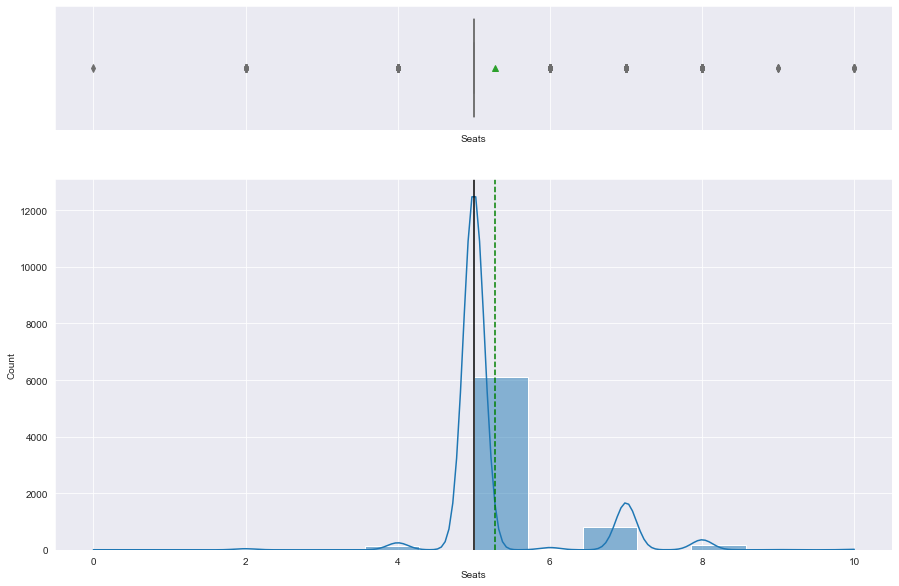

In [43]:
histogram_boxplot(df.Seats)

* Highly clustered with outliers to both sides
* Zero values would seem to be in error

In [44]:
df.groupby('Seats')['Price'].mean()

Seats
0.00    18.00
2.00    50.65
4.00    18.96
5.00     8.37
6.00     9.28
7.00    13.94
8.00     7.77
9.00     4.45
10.00    4.69
Name: Price, dtype: float64

### Observe Mileage

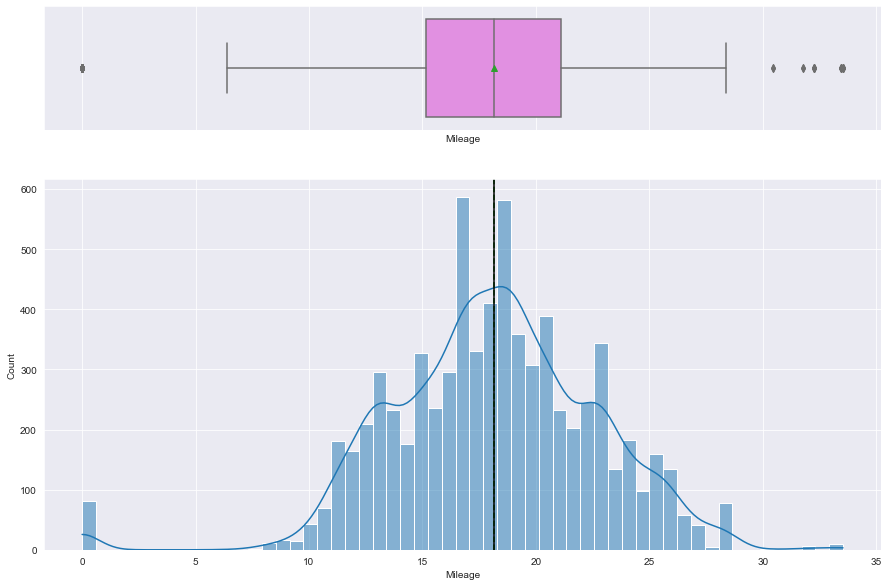

In [45]:
histogram_boxplot(df.Mileage)

* Appears to have normal distribution with some outliers to both sides
* Zero values seem to be in error

In [46]:
df.groupby('Brand_Name')['Price'].mean()

Brand_Name
Ambassador        1.35
Audi             25.19
BMW              24.63
Bentley          59.00
Chevrolet         2.94
Datsun            3.06
Fiat              3.09
Force             9.33
Ford              6.66
Hindustan         5.35
Honda             5.33
Hyundai           5.21
Isuzu            15.23
Jaguar           36.68
Jeep             18.67
Lamborghini     120.00
Land             38.81
Mahindra          7.96
Maruti            4.46
Mercedes-Benz    26.35
Mini             26.48
Mitsubishi       10.78
Nissan            4.64
OpelCorsa         5.35
Porsche          48.28
Renault           5.75
Skoda             7.34
Smart             3.00
Tata              3.44
Toyota           11.42
Volkswagen        5.24
Volvo            18.66
Name: Price, dtype: float64

## Categorical Variables

## Create Function to add percentage to barplots

In [47]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observe Location

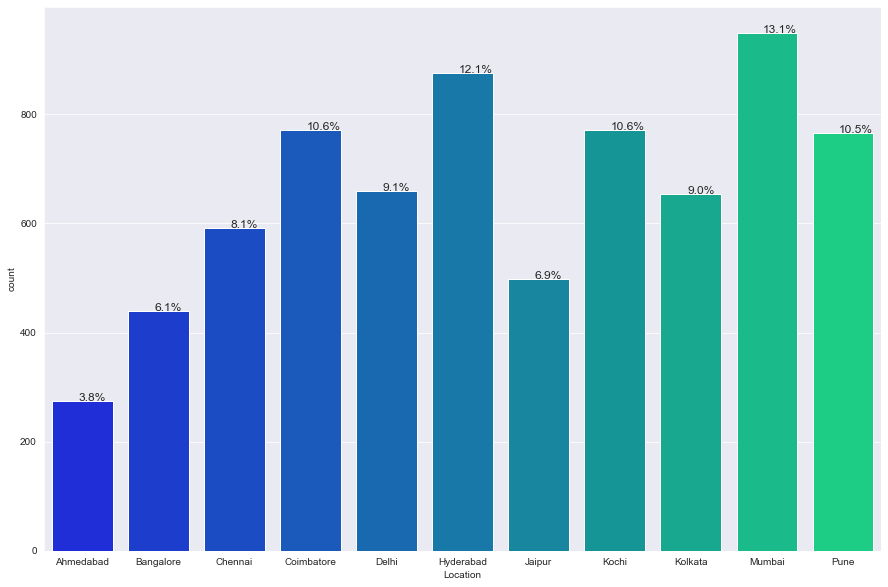

In [48]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Location"],palette='winter')
perc_on_bar(ax,df["Location"])

In [49]:
df['Location'].value_counts()

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

* Mumbai is the most common location followed closely by Hyderbad
* Ahmedabad has the least number of occurences

### Observe Fuel_Type

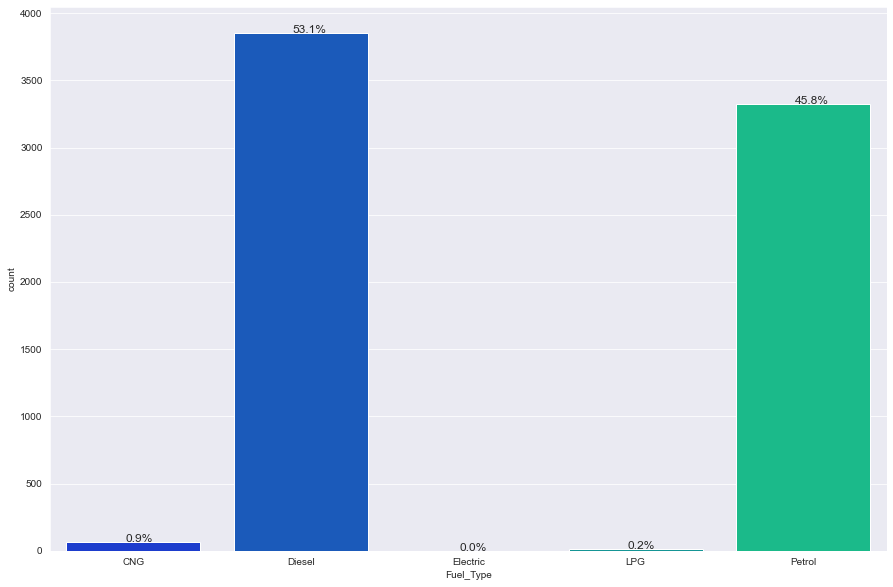

In [50]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Fuel_Type"],palette='winter')
perc_on_bar(ax,df["Fuel_Type"])

In [51]:
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

* Diesel fuel accounts for 53.1% of vehicles followed closely by Petrol with 45.8%
* There are a few cars which utilize CNG, LPG ro electcity for fuel

### Observe Transmission

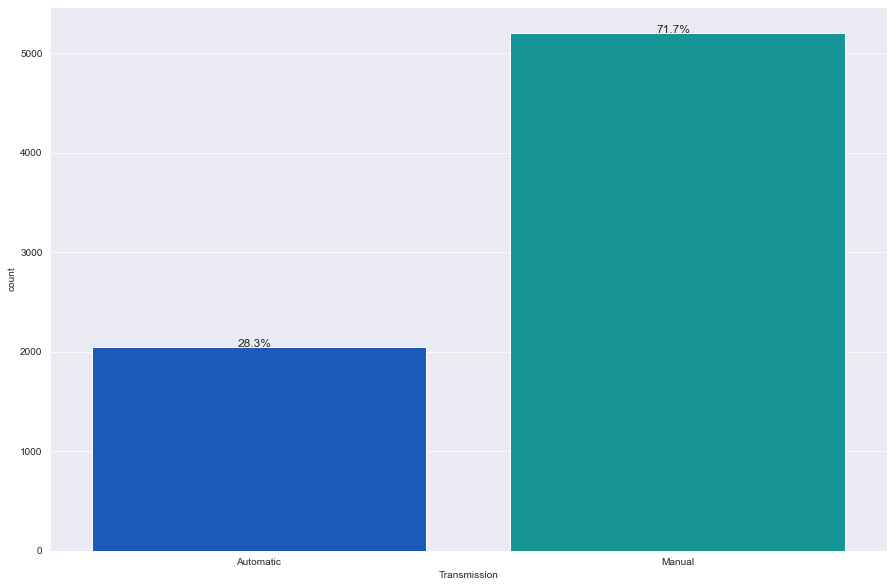

In [52]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Transmission"],palette='winter')
perc_on_bar(ax,df["Transmission"])

* Most vehicles have manual transmissions accounting for 71.7%

### Observe Brand_Name

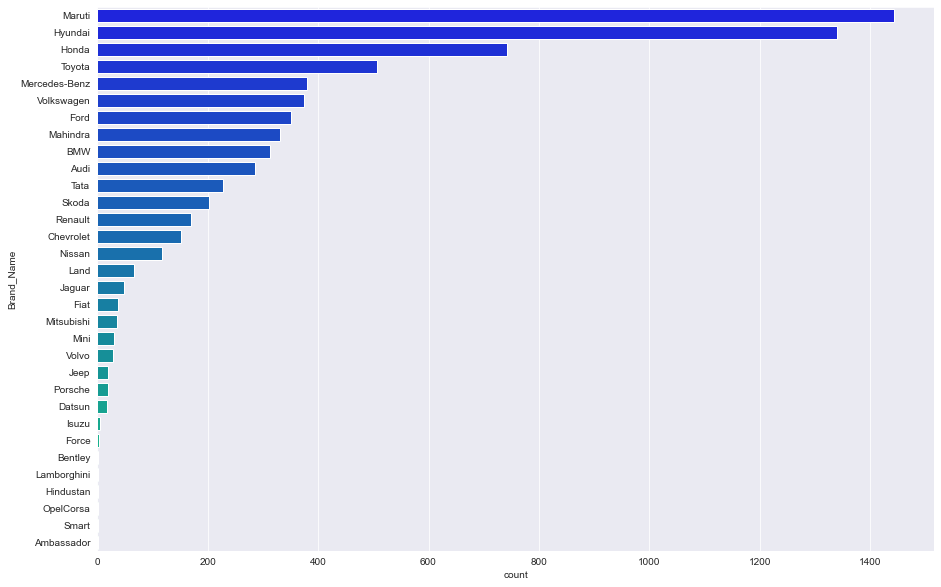

In [53]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y="Brand_Name", data=df, order=df['Brand_Name'].value_counts().index, palette='winter')


In [54]:
df['Brand_Name'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
Hindustan           1
OpelCorsa           1
Smart               1
Ambassador          1
Name: Brand_Name, dtype: int64

In [55]:
b = df['Brand_Name'].value_counts() / 7253
print(b)

Maruti          0.20
Hyundai         0.18
Honda           0.10
Toyota          0.07
Mercedes-Benz   0.05
Volkswagen      0.05
Ford            0.05
Mahindra        0.05
BMW             0.04
Audi            0.04
Tata            0.03
Skoda           0.03
Renault         0.02
Chevrolet       0.02
Nissan          0.02
Land            0.01
Jaguar          0.01
Fiat            0.01
Mitsubishi      0.00
Mini            0.00
Volvo           0.00
Jeep            0.00
Porsche         0.00
Datsun          0.00
Isuzu           0.00
Force           0.00
Bentley         0.00
Lamborghini     0.00
Hindustan       0.00
OpelCorsa       0.00
Smart           0.00
Ambassador      0.00
Name: Brand_Name, dtype: float64


* top ten brands account for 78% of the total observations

### Observe Seats

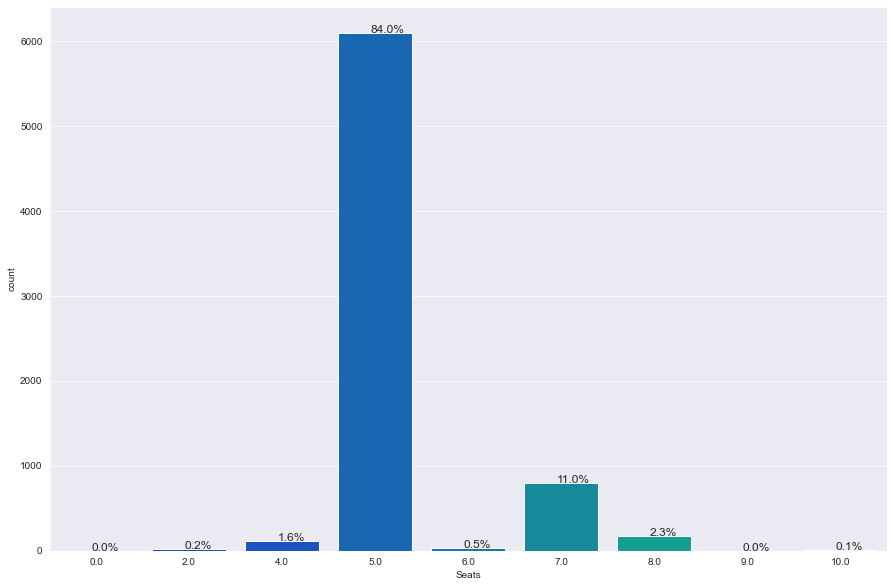

In [56]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Seats"],palette='winter')
perc_on_bar(ax,df["Seats"])

### Observe Owner_Type

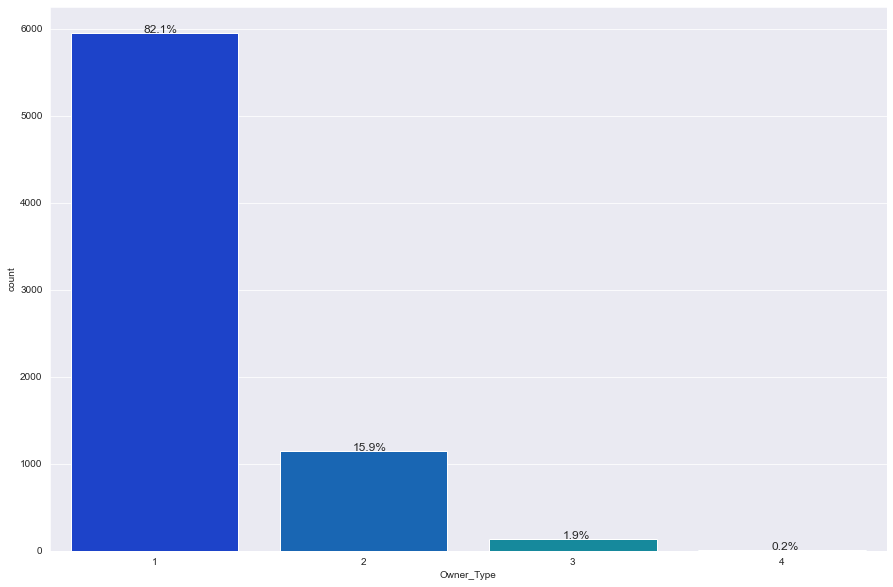

In [57]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Owner_Type"],palette='winter')
perc_on_bar(ax,df["Owner_Type"])

### Observe Fuel_Type

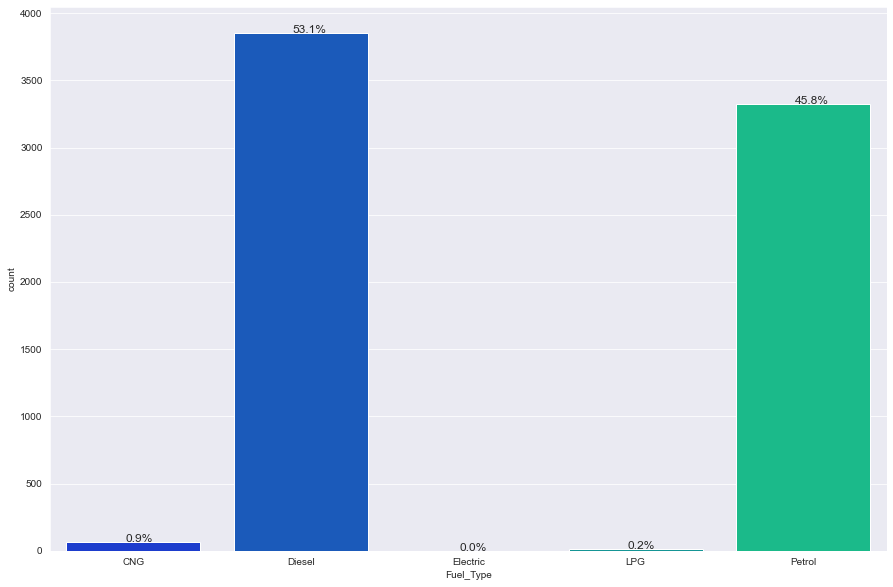

In [58]:
plt.figure(figsize=(15,10))
ax = sns.countplot(df["Fuel_Type"],palette='winter')
perc_on_bar(ax,df["Fuel_Type"])

## Bivariate Analysis

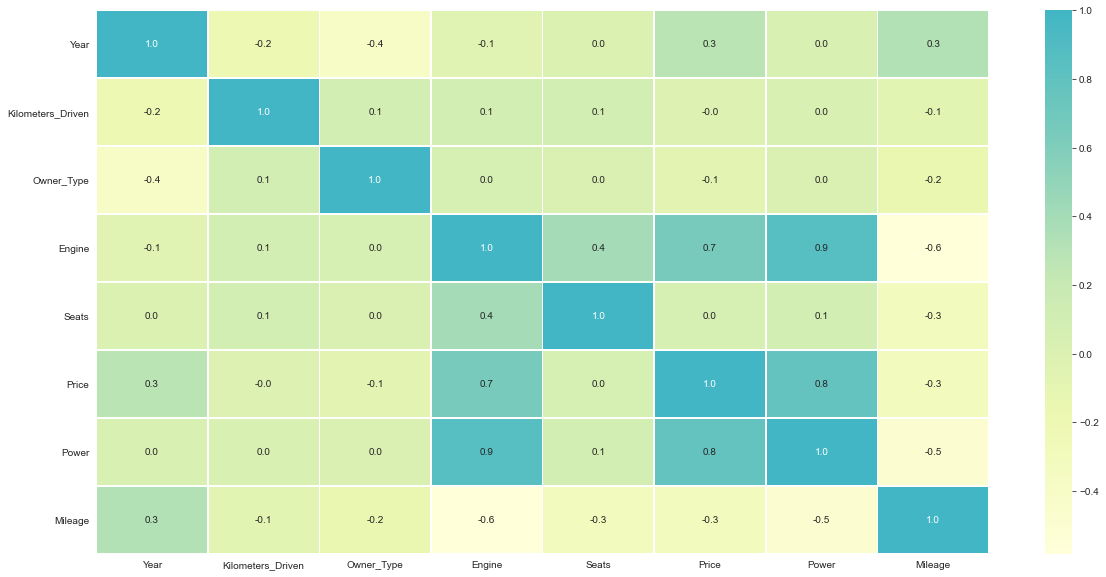

In [59]:
# heatmap of numerical values

plt.figure(figsize=(20,10)) # set size of plot
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1, cmap='YlGnBu')  # set line widths, format, and color
plt.show()

In [60]:
df.corr()

,Year,Kilometers_Driven,Owner_Type,Engine,Seats,Price,Power,Mileage
Year,1.00,-0.19,-0.40,-0.05,0.01,0.27,0.02,0.32
Kilometers_Driven,-0.19,1.00,0.09,0.09,0.09,-0.01,0.03,-0.07
Owner_Type,-0.40,0.09,1.00,0.05,0.02,-0.09,0.02,-0.16
Engine,-0.05,0.09,0.05,1.00,0.40,0.65,0.86,-0.58
Seats,0.01,0.09,0.02,0.40,1.00,0.05,0.09,-0.30
Price,0.27,-0.01,-0.09,0.65,0.05,1.00,0.77,-0.31
Power,0.02,0.03,0.02,0.86,0.09,0.77,1.00,-0.49
Mileage,0.32,-0.07,-0.16,-0.58,-0.30,-0.31,-0.49,1.00


* Price, Power, and Engine seem to have strong positve correlation. I should check for Multicollinearity during model building phase

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   int32   
 6   Engine             7253 non-null   float64 
 7   Seats              7253 non-null   float64 
 8   Price              7253 non-null   float64 
 9   Brand_Name         7253 non-null   category
 10  Model_Name         7253 non-null   category
 11  Power              7253 non-null   float64 
 12  Mileage            7253 non-null   float64 
dtypes: category(5), float64(5), int32(1), int64(2)
memory usage: 565.7 KB


In [62]:
df.nunique()

Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Engine                150
Seats                   9
Price                1378
Brand_Name             32
Model_Name           2041
Power                 384
Mileage               438
dtype: int64

### Price vs Transmission

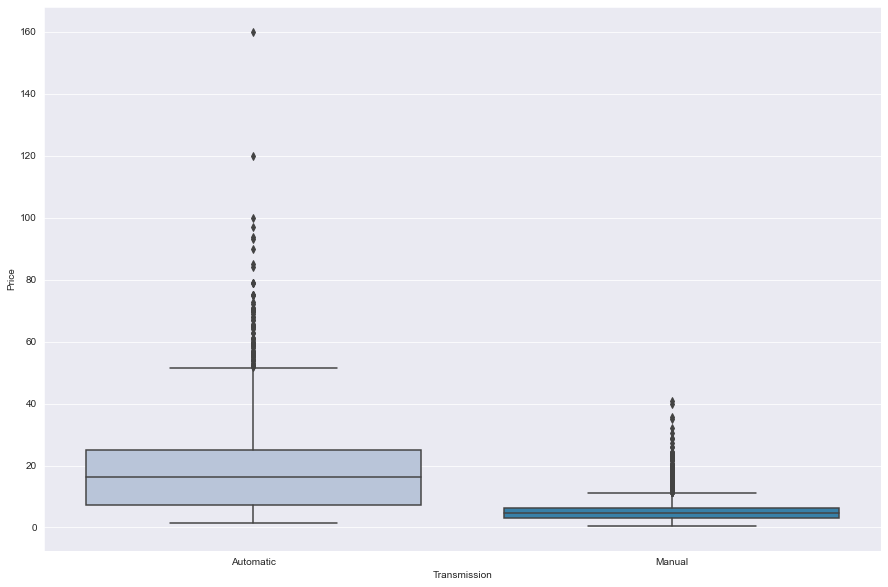

In [63]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Transmission"],df["Price"],palette="PuBu")
plt.show()

* Automatic transmission cars tend to have higher prices

### Price vs Owner_Type

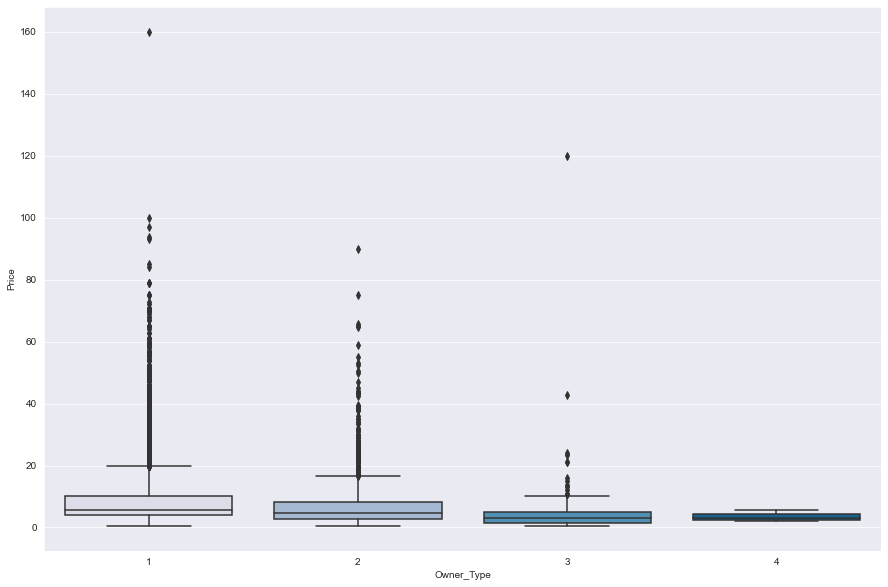

In [64]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Owner_Type"],df["Price"],palette="PuBu")
plt.show()

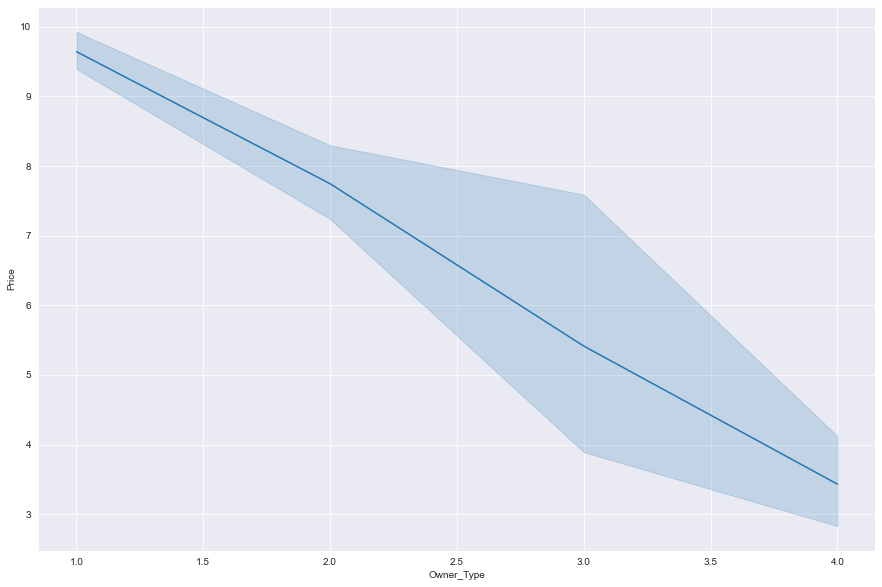

In [65]:
plt.figure(figsize=(15,10))
sns.lineplot(df["Owner_Type"],df["Price"],palette="PuBu")
plt.show()

* Cars with the leaset number of owners command higher prices

### Price vs Kilometers_ Driven

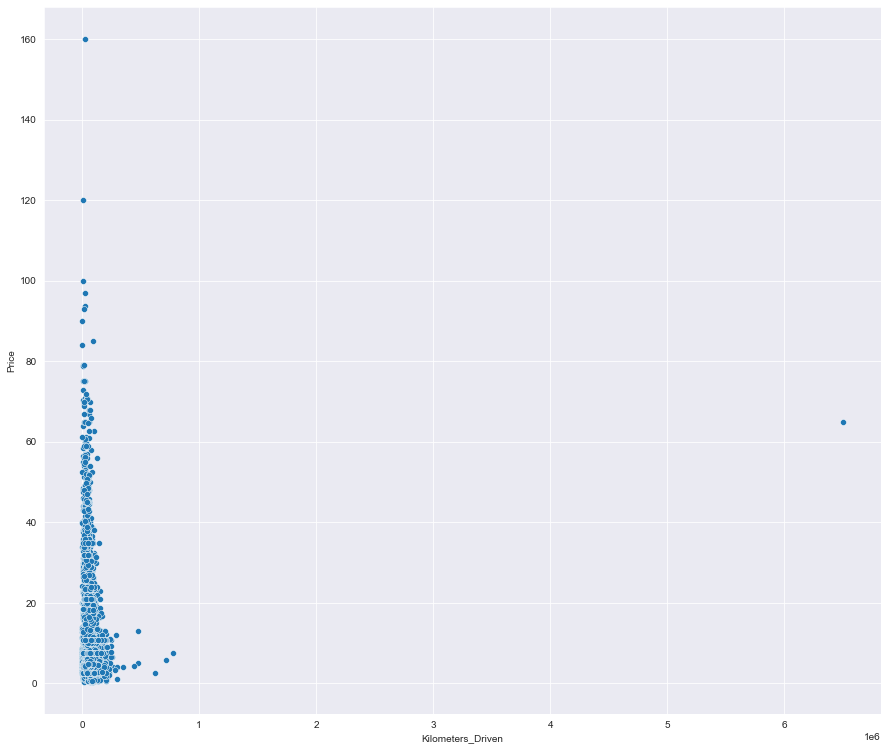

In [66]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Kilometers_Driven', data=df);

* There seems to be a negative relationship between kilometers driven and  price

### Price vs Year

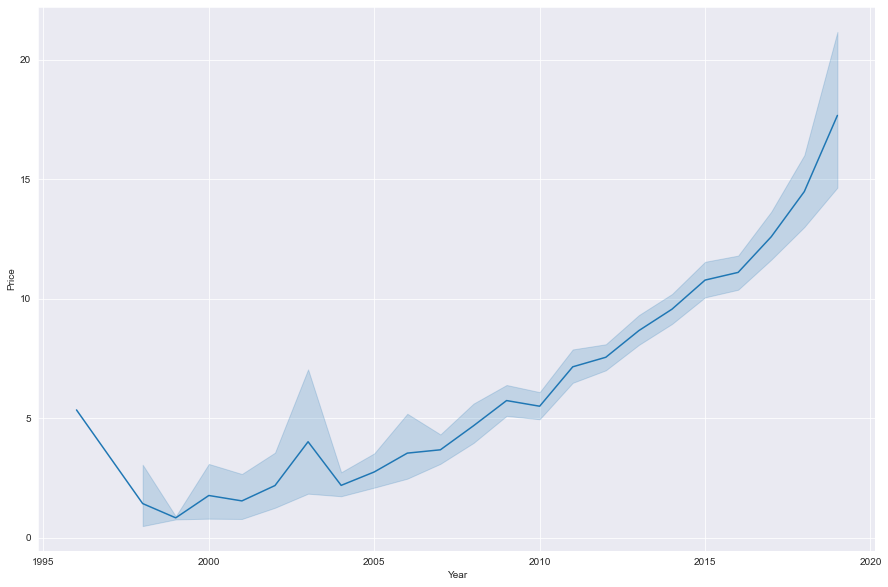

In [67]:
plt.figure(figsize=(15,10))
sns.lineplot(df["Year"],df["Price"],palette="PuBu")
plt.show()

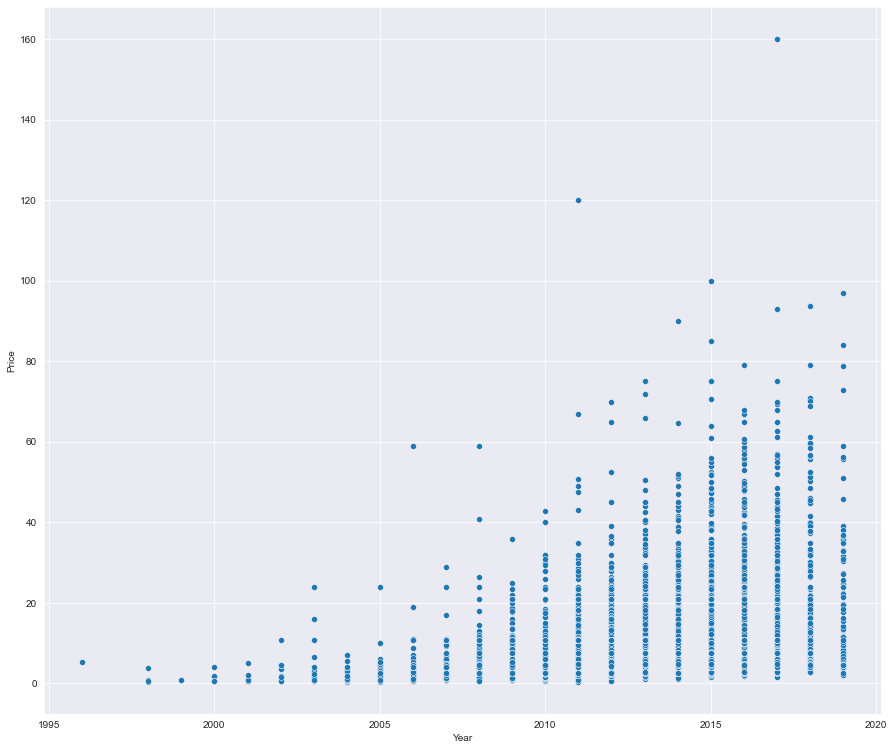

In [68]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Year', data=df);

* As expected, newer cars command higher prices

### Price vs Mileage

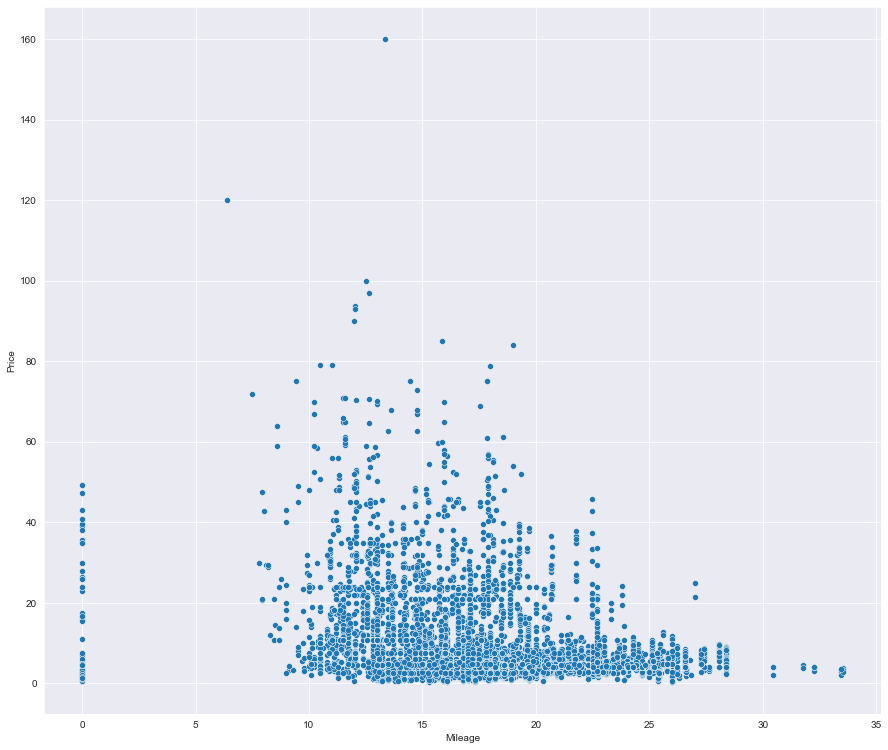

In [69]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Mileage', data=df);

In [70]:
df[df['Mileage'] == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand_Name,Model_Name,Power,Mileage
14,Pune,2012,85000,Diesel,Automatic,2,2179.00,5.00,17.50,Land,Rover Freelander 2 TD4 SE,115.00,0.00
67,Coimbatore,2019,15369,Diesel,Automatic,1,1950.00,5.00,35.67,Mercedes-Benz,C-Class Progressive C 220d,194.00,0.00
79,Hyderabad,2005,87591,Petrol,Manual,1,1086.00,5.00,1.30,Hyundai,Santro Xing XL,82.00,0.00
194,Ahmedabad,2007,60006,Petrol,Manual,1,1497.00,5.00,2.95,Honda,City 1.5 GXI,98.60,0.00
229,Bangalore,2015,70436,Diesel,Manual,1,1498.00,5.00,3.60,Ford,Figo Diesel,99.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Kolkata,2016,27000,Diesel,Manual,1,2179.00,7.00,7.57,Mahindra,TUV 300 P4,120.00,0.00
6697,Jaipur,2007,85000,Petrol,Manual,2,1086.00,5.00,4.60,Hyundai,Santro Xing XL,82.00,0.00
6857,Mumbai,2011,87000,Diesel,Automatic,1,2179.00,5.00,35.00,Land,Rover Freelander 2 TD4 SE,115.00,0.00
6957,Kochi,2019,11574,Petrol,Manual,1,1199.00,5.00,4.95,Honda,Jazz 2020 Petrol,88.70,0.00


* 81 rows contain 0 value for Mileage
* During model building I can exclude these columns as outliers or replace zeros with median values
* I will choose to replace wtih median values based on Brand_Name since other columns may have useful signal

## Price vs Power

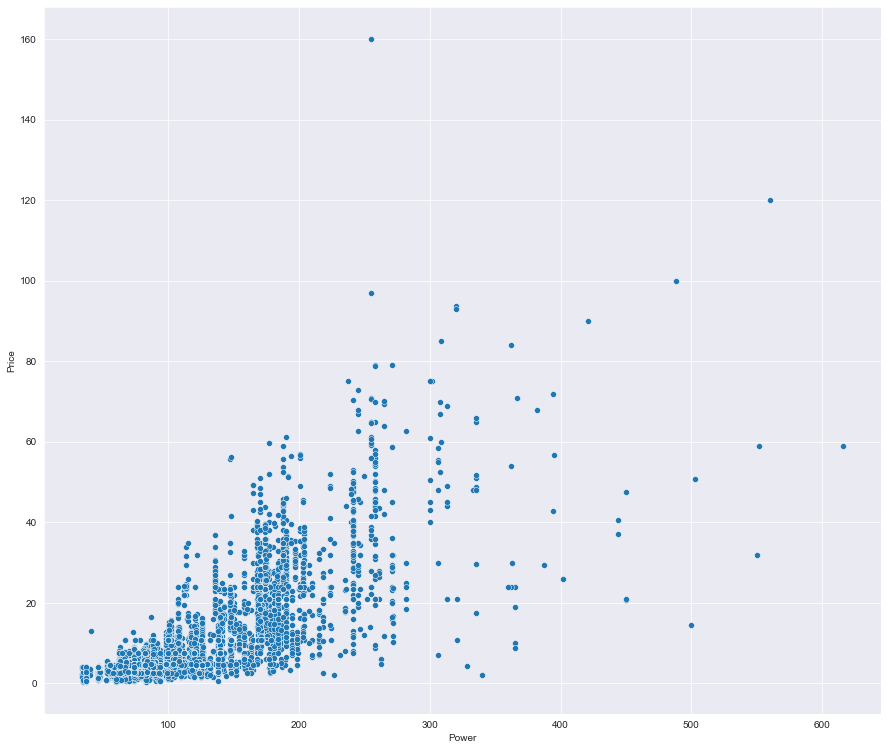

In [71]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Power', data=df);

* Cars with more power tend to cost more

### Price vs Engine

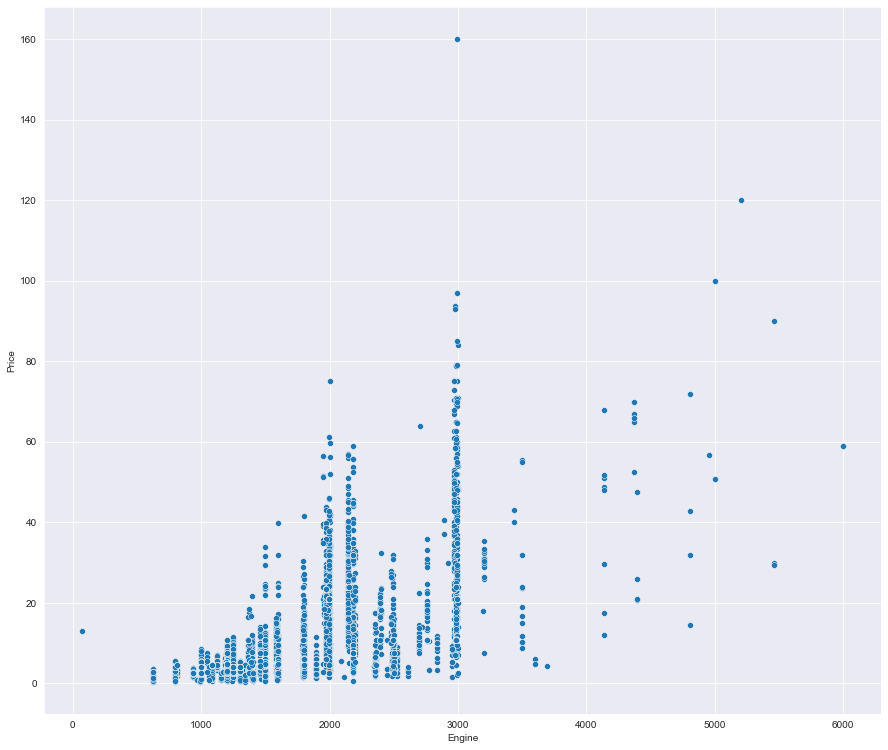

In [72]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Engine', data=df);

* There seems to be a positive relationship between price and engine size

### Price vs Seats

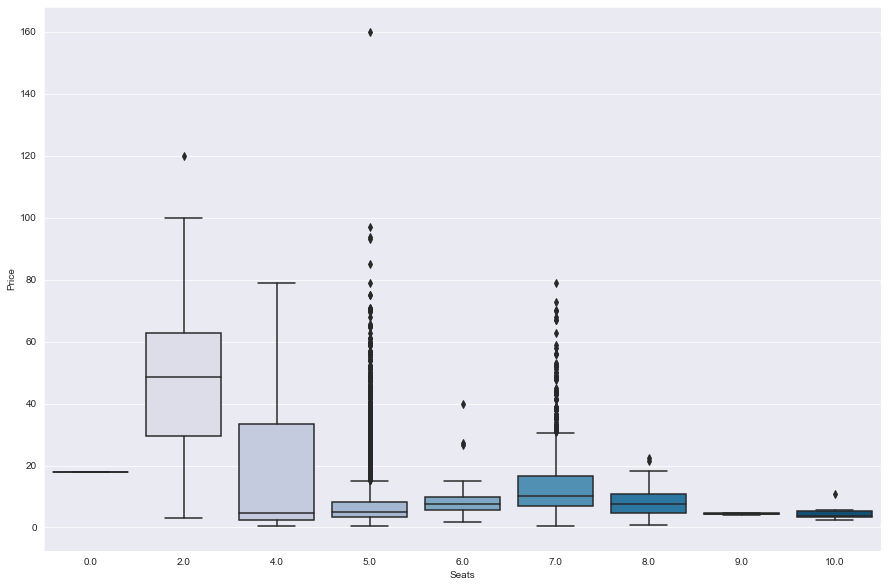

In [73]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Seats"],df["Price"],palette="PuBu")
plt.show()

* Cars with 2 seats have the highest average and median price
* 5 seats is the most common. There is one big outlier.


### Price vs Fuel_Type

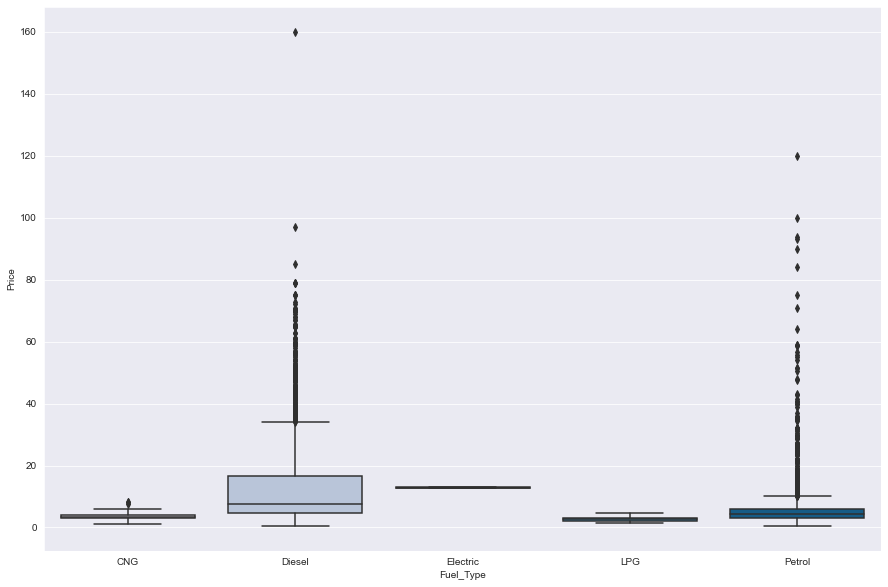

In [74]:
plt.figure(figsize=(15,10))
sns.boxplot(df["Fuel_Type"],df["Price"],palette="PuBu")
plt.show()

* Diesel cars have the highes median price

### Price vs Power vs Owner

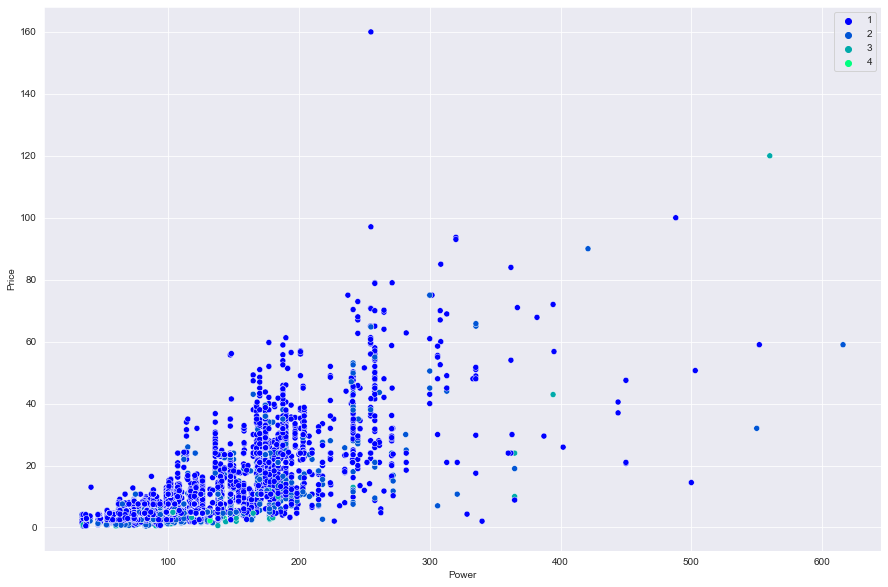

In [75]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Power"],df["Price"],hue=df["Owner_Type"],ci=0,palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Cars with one owner and big power have higher prices

### Price vs Power vs Location

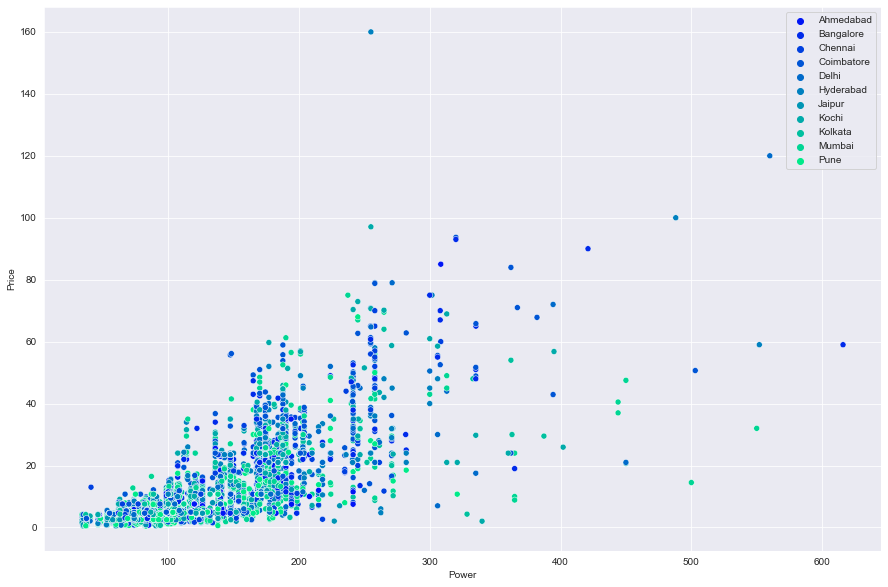

In [76]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Power"],df["Price"],hue=df["Location"],ci=0,palette="winter")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Cars with more power in bigger cities have highest prices

### Prive vs Kilo Driven vs Location

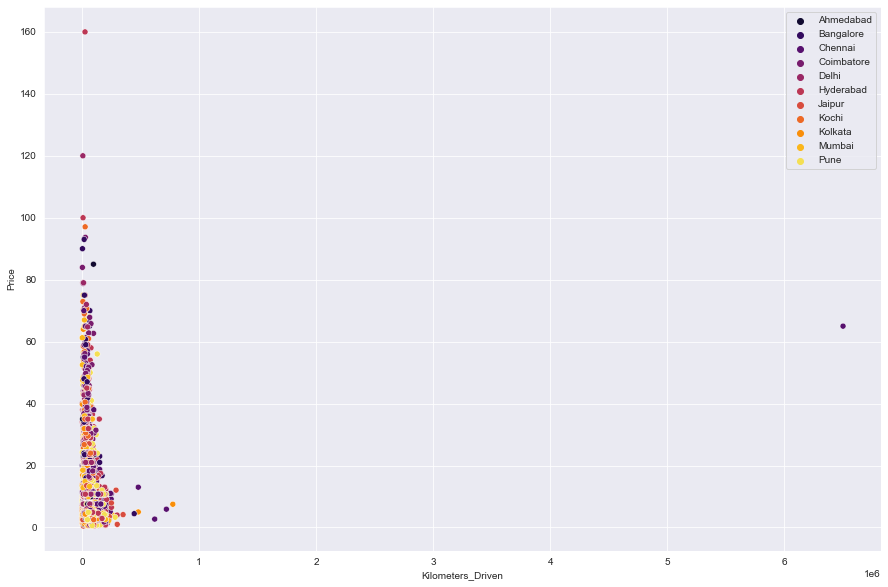

In [77]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Kilometers_Driven"],df["Price"],hue=df["Location"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Cars with less km driven and bigger cities have higher prices


# Outliers Treatment

### Replace zero values in Mileage with median groupby Brand_Name

In [78]:
# Replace zero value with nan
df['Mileage'] = df['Mileage'].replace([0], 'NaN')
df['Mileage'] = df['Mileage'].astype('float')
df['Mileage'] = df['Mileage'].fillna(df.groupby('Brand_Name')['Mileage'].transform('median'))
df.info()

# replace nan with median groupby Brand_Name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7253 non-null   category
 1   Year               7253 non-null   int64   
 2   Kilometers_Driven  7253 non-null   int64   
 3   Fuel_Type          7253 non-null   category
 4   Transmission       7253 non-null   category
 5   Owner_Type         7253 non-null   int32   
 6   Engine             7253 non-null   float64 
 7   Seats              7253 non-null   float64 
 8   Price              7253 non-null   float64 
 9   Brand_Name         7253 non-null   category
 10  Model_Name         7253 non-null   category
 11  Power              7253 non-null   float64 
 12  Mileage            7252 non-null   float64 
dtypes: category(5), float64(5), int32(1), int64(2)
memory usage: 565.7 KB


In [79]:
df = df.drop(915) # drop row 915

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   category
 1   Year               7252 non-null   int64   
 2   Kilometers_Driven  7252 non-null   int64   
 3   Fuel_Type          7252 non-null   category
 4   Transmission       7252 non-null   category
 5   Owner_Type         7252 non-null   int32   
 6   Engine             7252 non-null   float64 
 7   Seats              7252 non-null   float64 
 8   Price              7252 non-null   float64 
 9   Brand_Name         7252 non-null   category
 10  Model_Name         7252 non-null   category
 11  Power              7252 non-null   float64 
 12  Mileage            7252 non-null   float64 
dtypes: category(5), float64(5), int32(1), int64(2)
memory usage: 622.2 KB


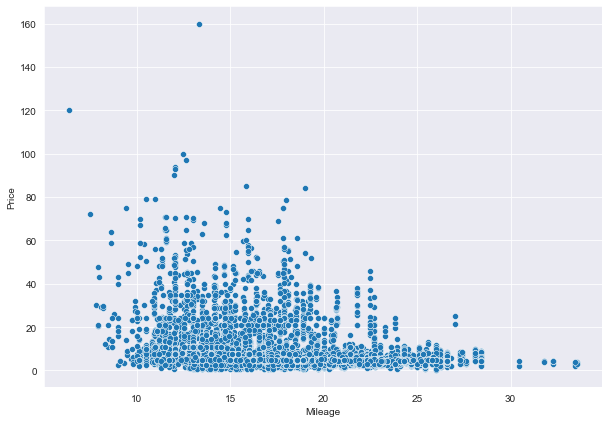

In [80]:
plt.figure(figsize=(10,7))
sns.scatterplot(y='Price', x='Mileage', data=df);

* Replaced zero values with median based on Brand_Name
* There does not seem to be a strong relationship between mileage and Price

## Observe Outliers

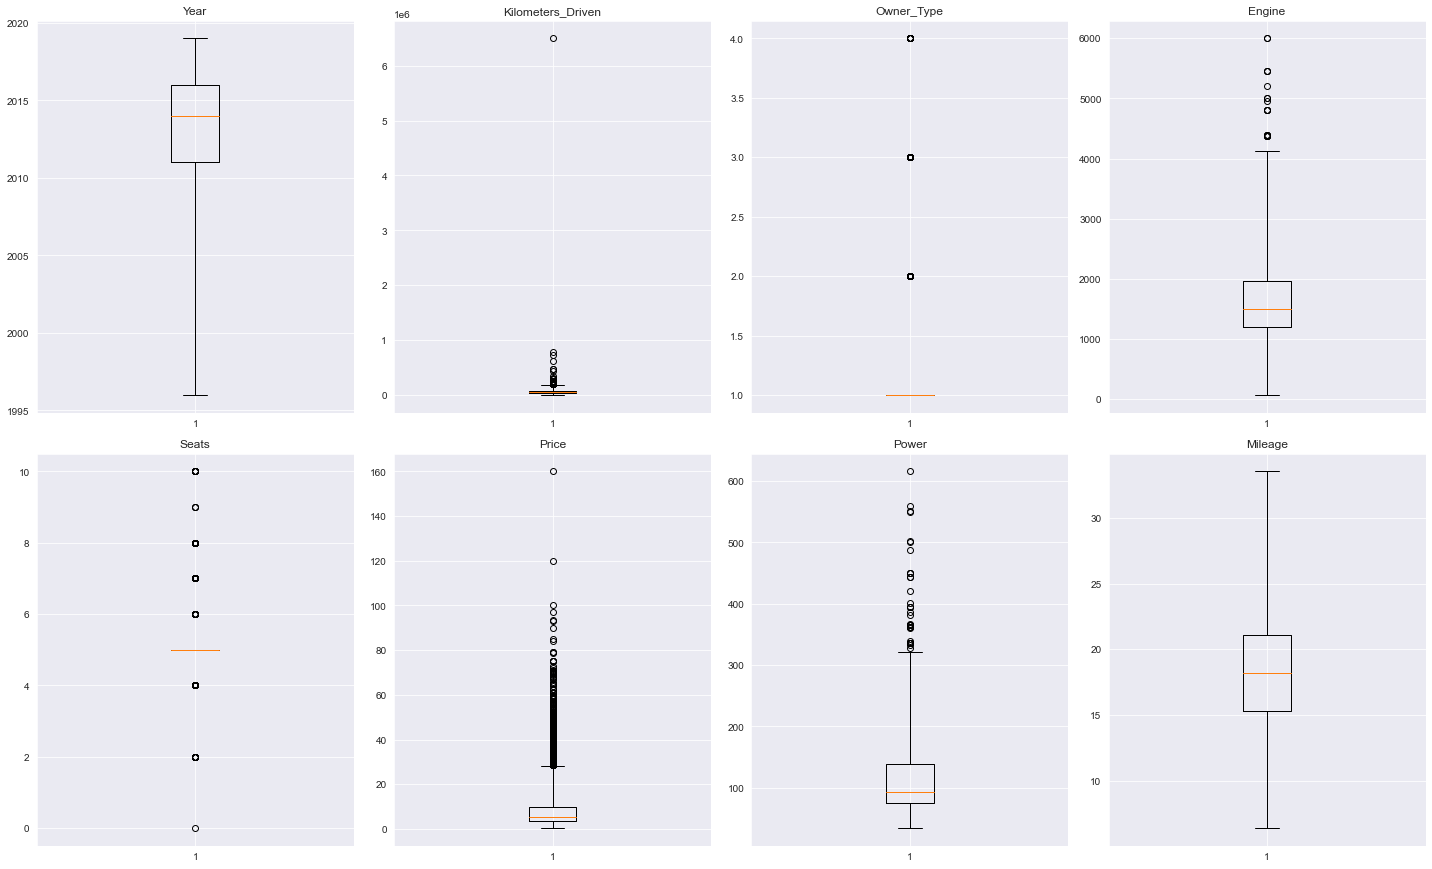

In [81]:
# lets plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=3)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* There are many outliers which appear to be outside of the 1.5 IQR range.

### Outlier detection using z-score 

In [82]:
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)



In [83]:
x1 = df['Kilometers_Driven']
x2 = df['Engine']
x3 = df['Seats']
x4 = df['Price']
x5 = df['Power']

#### z-score Kilometers_Driven

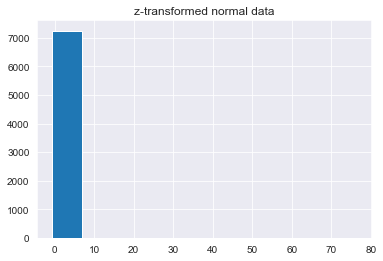

In [84]:
plt.hist(z_transform(x1))
plt.title('z-transformed normal data')
plt.show()

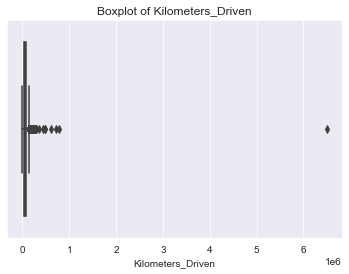

In [85]:

sns.boxplot(df['Kilometers_Driven'])
plt.title('Boxplot of Kilometers_Driven')
plt.show()

* does not work well on Kilometers_Driven because the data is not normal
* Big outlier may be best to be dropped

In [86]:
df['Kilometers_Driven'].max() #find outlier

6500000

In [87]:
df[df['Kilometers_Driven'] == 6500000] #identify row with outlier value

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand_Name,Model_Name,Power,Mileage
2328,Chennai,2017,6500000,Diesel,Automatic,1,2993.00,5.00,65.00,BMW,X5 xDrive 30d M Sport,258.00,15.97


In [88]:
df = df.drop(2328) # drop row 2328

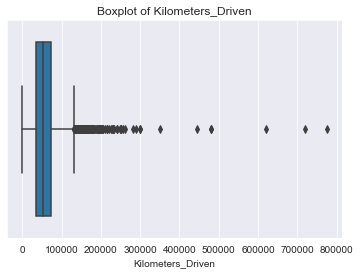

In [89]:
# recheck box plot. Still skewed but seems more reasonable. 
sns.boxplot(df['Kilometers_Driven'])
plt.title('Boxplot of Kilometers_Driven')
plt.show()

#### z-score Engine

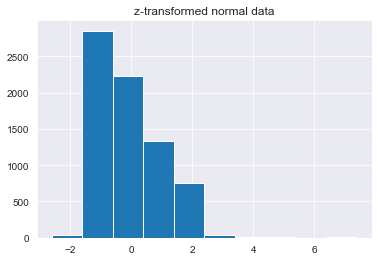

In [90]:
plt.hist(z_transform(x2))
plt.title('z-transformed normal data')
plt.show()

* Scores fall withing 3 std dev

#### z-score Seats

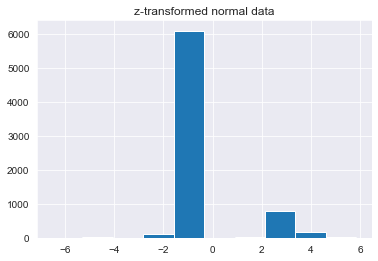

In [91]:
plt.hist(z_transform(x3))
plt.title('z-transformed normal data')
plt.show()

* some values are more than 3 standard dev but may be okay

In [92]:
df['Seats'].value_counts()

5.00     6095
7.00      800
8.00      170
4.00      119
6.00       38
2.00       17
10.00       8
9.00        3
0.00        1
Name: Seats, dtype: int64

* one outlier is zero seats. We can drop or replace with median

In [93]:
df[df['Seats'] == 0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand_Name,Model_Name,Power,Mileage
3999,Hyderabad,2012,125000,Petrol,Automatic,1,3197.00,0.00,18.00,Audi,A4 3.2 FSI Tiptronic Quattro,174.33,10.50


In [94]:
df = df.drop(3999) # drop row 3999

In [95]:
df['Seats'].value_counts() # confirm it dropped

5.00     6095
7.00      800
8.00      170
4.00      119
6.00       38
2.00       17
10.00       8
9.00        3
Name: Seats, dtype: int64

#### z-score Price

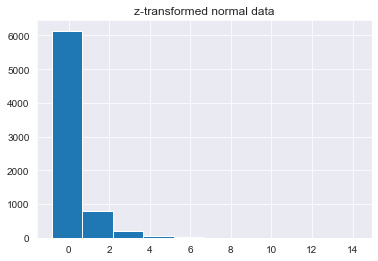

In [96]:
plt.hist(z_transform(x4))
plt.title('z-transformed normal data')
plt.show()

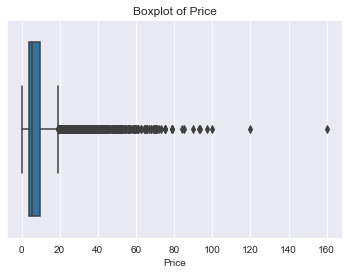

In [97]:
sns.boxplot(df['Price'])
plt.title('Boxplot of Price')
plt.show()

#### z-score Power

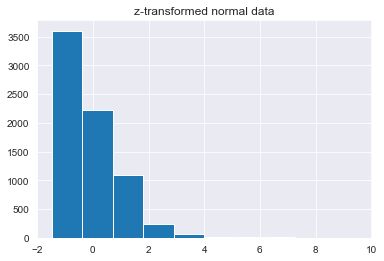

In [98]:
plt.hist(z_transform(x5))
plt.title('z-transformed normal data')
plt.show()

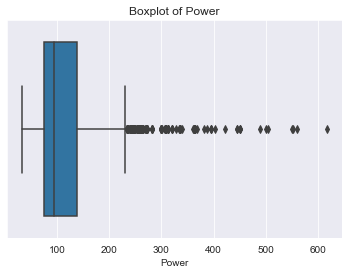

In [99]:
sns.boxplot(df['Power'])
plt.title('Boxplot of Power')
plt.show()

* There are some values which fall more than 3 std dev from the mean and outliers to the high side but they may be ok

### Observe points that fall outside 4 IQR and trim where necessary

### Treat outliers Kilometers_Driven

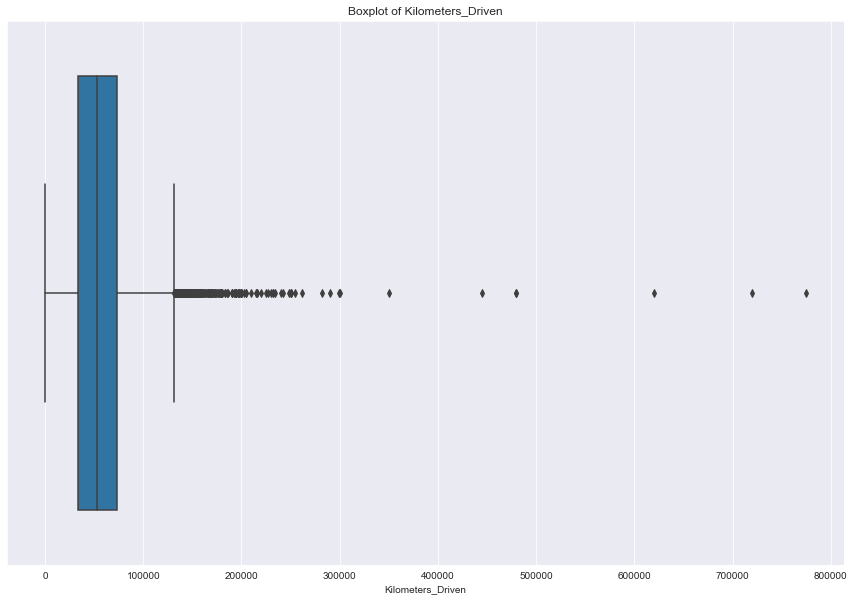

In [100]:
plt.figure(figsize=(15,10))
sns.boxplot(df['Kilometers_Driven'])
plt.title('Boxplot of Kilometers_Driven')
plt.show()

#### check and observe 4*IQR

In [101]:
kd_quartiles = np.quantile(df['Kilometers_Driven'][df['Kilometers_Driven'].notnull()], [.25, .75])
Kilometers_Driven_4iqr = 4 * (kd_quartiles[1] - kd_quartiles[0])
print(f'Q1 = {kd_quartiles[0]}, Q3 = {kd_quartiles[1]}, 4*IQR = {Kilometers_Driven_4iqr}')
outlier_Kilometers_Driven = df.loc[np.abs(df['Kilometers_Driven'] - df['Kilometers_Driven'].median()) > Kilometers_Driven_4iqr, 'Kilometers_Driven']
outlier_Kilometers_Driven

Q1 = 34000.0, Q3 = 73000.0, 4*IQR = 156000.0


29      262000
77      230000
181     216000
340     775000
358     620000
838     215000
1068    225000
1101    248000
1442    231673
1528    299322
1766    220000
1846    255000
1860    720000
1975    282000
2267    215750
2346    234000
2823    480000
2988    240000
3092    480000
3649    300000
3713    232000
3894    250000
4491    445000
4719    250000
4792    242000
5647    227000
5800    210000
5834    250000
6919    290000
6921    350000
Name: Kilometers_Driven, dtype: int64

In [102]:
# I dont' want to get too agressive so I am going to cap everything > 250,000 miles

df['Kilometers_Driven'] = np.where(df['Kilometers_Driven'] > 250000, 250000,df['Kilometers_Driven'])


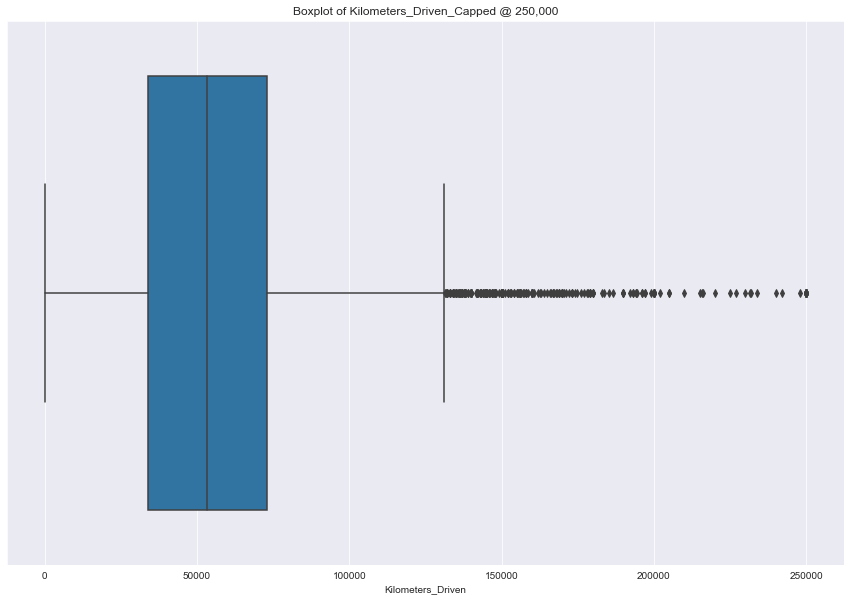

In [103]:
# recheck boxplot to see outliers have been capped
plt.figure(figsize=(15,10))
sns.boxplot(df['Kilometers_Driven'])
plt.title('Boxplot of Kilometers_Driven_Capped @ 250,000')
plt.show()

In [104]:
df['Kilometers_Driven'].mean()

57476.963172413794

### Treat Outliers Power

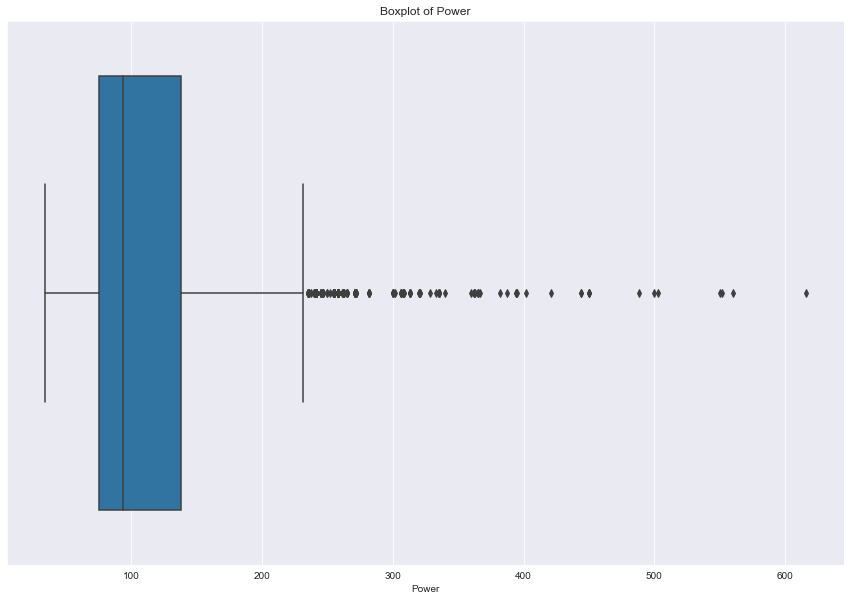

In [105]:
plt.figure(figsize=(15,10))
sns.boxplot(df['Power'])
plt.title('Boxplot of Power')
plt.show()

#### check and observe 4*IQR

In [106]:
power_quartiles = np.quantile(df['Power'][df['Power'].notnull()], [.25, .75])
Power_4iqr = 4 * (power_quartiles[1] - power_quartiles[0])
print(f'Q1 = {power_quartiles[0]}, Q3 = {power_quartiles[1]}, 4*IQR = {Power_4iqr}')
outlier_Power = df.loc[np.abs(df['Power'] - df['Power'].median()) > Power_4iqr, 'Power']
outlier_Power

Q1 = 75.0, Q3 = 138.03, 4*IQR = 252.12


70     500.00
134    362.07
148    444.00
152    362.90
418    367.00
589    364.90
1930   364.90
2095   362.07
2100   550.00
2978   394.30
3341   402.00
4061   444.00
4342   364.90
4451   395.00
4627   450.00
4691   421.00
4722   387.30
4821   450.00
5088   503.00
5341   382.00
5521   552.00
5603   394.30
5781   560.00
5919   488.10
6186   364.90
6354   616.00
6960   362.07
7057   450.00
7117   360.00
Name: Power, dtype: float64

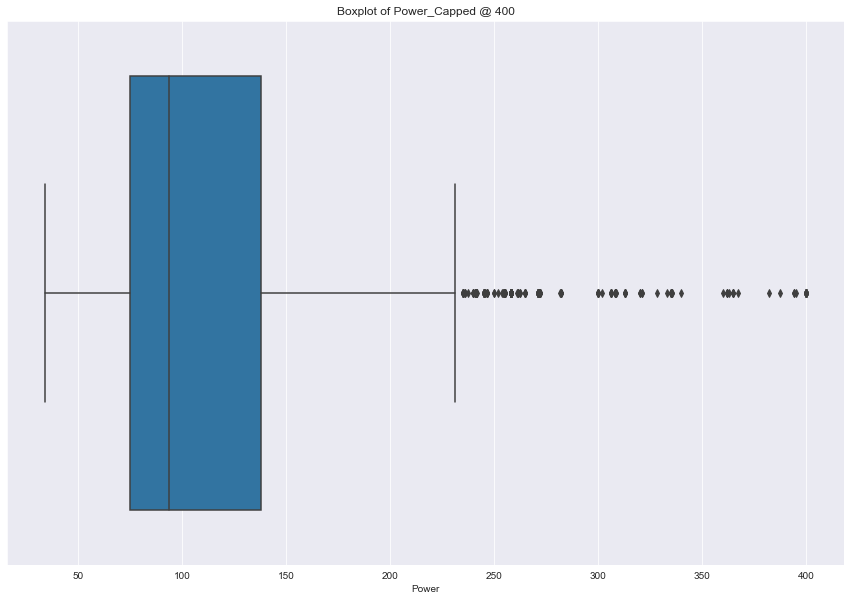

In [107]:
# I dont' want to get too agressive so I am going to cap everything > 400
plt.figure(figsize=(15,10))
df['Power'] = np.where(df['Power'] > 400, 400,df['Power'])
sns.boxplot(df['Power'])
plt.title('Boxplot of Power_Capped @ 400')
plt.show()

In [108]:
df['Power'].mean()

112.26788896551632

### Treat outliers Engine

In [109]:
df['Engine'].mean()

1615.824551724138

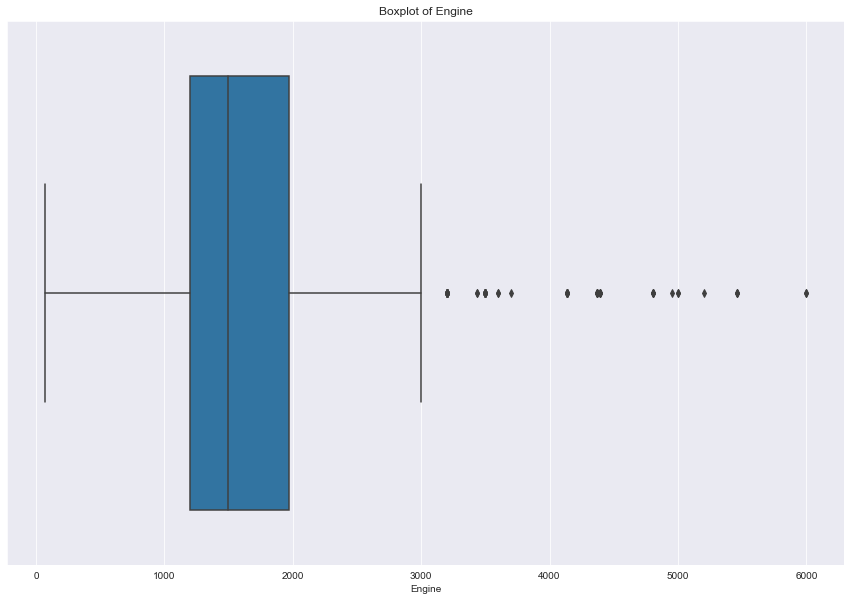

In [110]:
plt.figure(figsize=(15,10))
sns.boxplot(df['Engine'])
plt.title('Boxplot of Engine')
plt.show()

#### check and observe 4*IQR

In [111]:
engine_quartiles = np.quantile(df['Engine'][df['Engine'].notnull()], [.25, .75])
Engine_4iqr = 4 * (engine_quartiles[1] - engine_quartiles[0])
print(f'Q1 = {engine_quartiles[0]}, Q3 = {engine_quartiles[1]}, 4*IQR = {Engine_4iqr}')
outlier_Engine = df.loc[np.abs(df['Engine'] - df['Engine'].median()) > Engine_4iqr, 'Engine']
outlier_Engine

Q1 = 1198.0, Q3 = 1968.0, 4*IQR = 3080.0


70     4806.00
152    5461.00
2100   4806.00
2978   4806.00
4451   4951.00
4691   5461.00
4722   5461.00
5088   5000.00
5521   5998.00
5603   4806.00
5781   5204.00
5919   5000.00
6354   5998.00
Name: Engine, dtype: float64

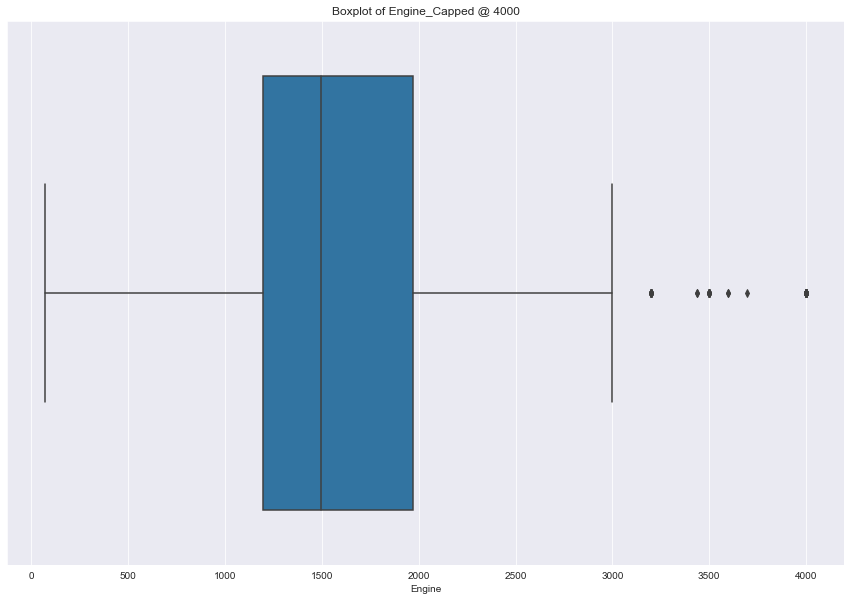

In [112]:
# I dont' want to get too agressive so I am going to cap everything > 4000
plt.figure(figsize=(15,10))
df['Engine'] = np.where(df['Engine'] > 4000, 4000,df['Engine'])
sns.boxplot(df['Engine'])
plt.title('Boxplot of Engine_Capped @ 4000')
plt.show()

In [113]:
df['Engine'].mean()

1613.0321379310344

### Treat outliers Price

In [114]:
df['Price'].mean()

9.244426896551678

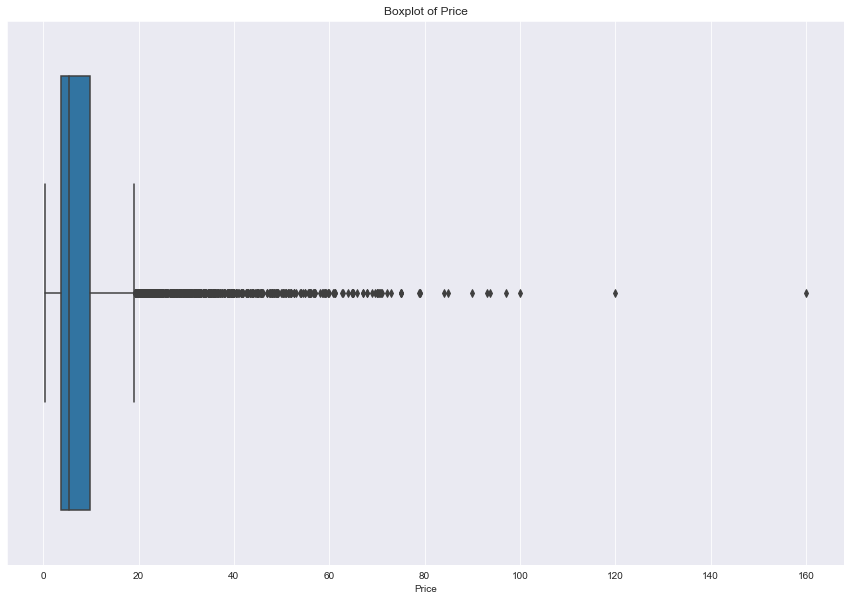

In [115]:
plt.figure(figsize=(15,10))
sns.boxplot(df['Price'])
plt.title('Boxplot of Price')
plt.show()

#### check and observe 4*IQR

In [116]:
price_quartiles = np.quantile(df['Price'][df['Price'].notnull()], [.25, .75])
Price_4iqr = 4 * (price_quartiles[1] - price_quartiles[0])
print(f'Q1 = {price_quartiles[0]}, Q4 = {price_quartiles[1]}, 4*IQR = {Price_4iqr}')
outlier_Price = df.loc[np.abs(df['Price'] - df['Price'].median()) > Price_4iqr, 'Price']
outlier_Price

Q1 = 3.75, Q4 = 9.8775, 4*IQR = 24.509999999999998


67     35.67
92     39.58
134    54.00
148    37.00
152    30.00
        ... 
6824   31.90
6857   35.00
6908   31.90
7157   35.00
7198   35.00
Name: Price, Length: 381, dtype: float64

In [117]:
df[df['Price'] > 99]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand_Name,Model_Name,Power,Mileage
4079,Hyderabad,2017,25000,Diesel,Automatic,1,2993.00,5.00,160.00,Land,Rover Range Rover 3.0 Diesel LWB Vogue,255.00,13.33
5781,Delhi,2011,6500,Petrol,Automatic,3,4000.00,2.00,120.00,Lamborghini,Gallardo Coupe,400.00,6.40
5919,Hyderabad,2015,8000,Petrol,Automatic,1,4000.00,2.00,100.00,Jaguar,F Type 5.0 V8 S,400.00,12.50


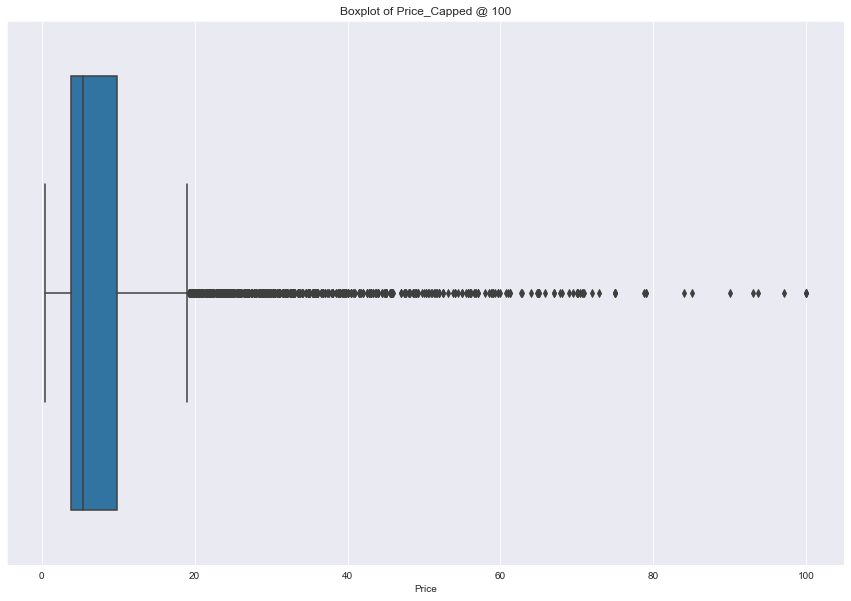

In [118]:
# I dont' want to get too agressive so I am going to cap everything > 100
plt.figure(figsize=(15,10))
df['Price'] = np.where(df['Price'] > 100, 100,df['Price'])
sns.boxplot(df['Price'])
plt.title('Boxplot of Price_Capped @ 100')
plt.show()

In [119]:
df['Price'].mean()

9.233392413793057

* There are many outling values but instead of removing them I want to try and transform
* I ran the model without timming them but got non-linearity. I went back to trim Kilometers_Driven, Power, Engine, and Price to 4*IQR

## Log Transform skewed variables


<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

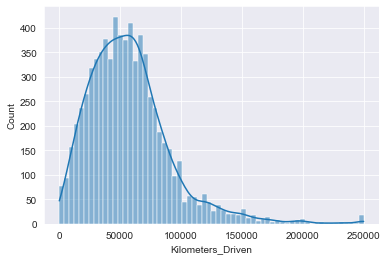

In [120]:
# Plot Kilometer_Driven and Observe skew
sns.histplot(df['Kilometers_Driven'], kde=True)

<AxesSubplot:xlabel='Kilometers_Driven_LOG', ylabel='Count'>

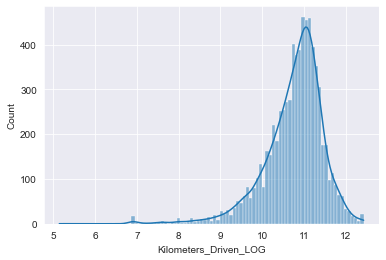

In [121]:
# log transform of Kilometers_Driven

df['Kilometers_Driven_LOG'] = np.log(df['Kilometers_Driven'])
sns.histplot(df['Kilometers_Driven_LOG'], kde=True)

* Values are closer to normal which should help our model

<AxesSubplot:xlabel='Power', ylabel='Count'>

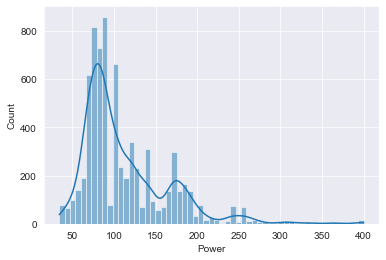

In [122]:
# Plot Power and observe skew
sns.histplot(df['Power'], kde=True)

<AxesSubplot:xlabel='Power_LOG', ylabel='Count'>

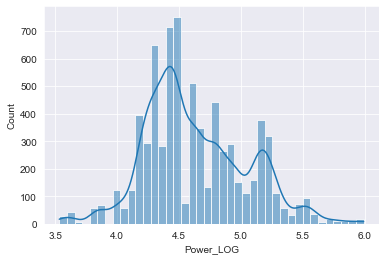

In [123]:
# log transform of Power

df['Power_LOG'] = np.log(df['Power'])
sns.histplot(df['Power_LOG'], kde=True)

* Values are closer to normal which should help our model

In [124]:
# Observe new LOG columns
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Seats,Price,Brand_Name,Model_Name,Power,Mileage,Kilometers_Driven_LOG,Power_LOG
0,Mumbai,2010,72000,CNG,Manual,1,998.00,5.00,1.75,Maruti,Wagon R LXI CNG,58.16,26.60,11.18,4.06
1,Pune,2015,41000,Diesel,Manual,1,1582.00,5.00,12.50,Hyundai,Creta 1.6 CRDi SX Option,126.20,19.67,10.62,4.84
2,Chennai,2011,46000,Petrol,Manual,1,1199.00,5.00,4.50,Honda,Jazz V,88.70,18.20,10.74,4.49
3,Chennai,2012,87000,Diesel,Manual,1,1248.00,7.00,6.00,Maruti,Ertiga VDI,88.76,20.77,11.37,4.49
4,Coimbatore,2013,40670,Diesel,Automatic,2,1968.00,5.00,17.74,Audi,A4 New 2.0 TDI Multitronic,140.80,15.20,10.61,4.95


* I have created LOG transformation columns for Kilometers_Driven and Power. These columns were highly skewed.
* The new logorithmic transformed columns appears to have more normal distributions and we hope will improve our model. We will need to test.



In [125]:
df.describe()

,Year,Kilometers_Driven,Owner_Type,Engine,Seats,Price,Power,Mileage,Kilometers_Driven_LOG,Power_LOG
count,7250.00,7250.00,7250.00,7250.00,7250.00,7250.00,7250.00,7250.00,7250.00,7250.00
mean,2013.37,57476.96,1.20,1613.03,5.28,9.23,112.27,18.33,10.76,4.63
std,3.25,34256.70,0.46,579.94,0.81,10.49,52.06,4.15,0.71,0.41
min,1996.00,171.00,1.00,72.00,2.00,0.44,34.20,6.40,5.14,3.53
25%,2011.00,34000.00,1.00,1198.00,5.00,3.75,75.00,15.30,10.43,4.32
50%,2014.00,53366.00,1.00,1493.00,5.00,5.35,93.70,18.20,10.88,4.54
75%,2016.00,73000.00,1.00,1968.00,5.00,9.88,138.03,21.10,11.20,4.93
max,2019.00,250000.00,4.00,4000.00,10.00,100.00,400.00,33.54,12.43,5.99


# Model Building

In [126]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Engine', 'Seats', 'Price', 'Brand_Name', 'Model_Name',
       'Power', 'Mileage', 'Kilometers_Driven_LOG', 'Power_LOG'],
      dtype='object')

In [127]:
#Defining X and y variables
X = df.drop(['Price','Kilometers_Driven_LOG','Model_Name', 'Power_LOG'], axis=1)
y = df[['Price']]

print(X.head())
print(y.head())

     Location  Year  Kilometers_Driven Fuel_Type Transmission  Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual           1   
1        Pune  2015              41000    Diesel       Manual           1   
2     Chennai  2011              46000    Petrol       Manual           1   
3     Chennai  2012              87000    Diesel       Manual           1   
4  Coimbatore  2013              40670    Diesel    Automatic           2   

   Engine  Seats Brand_Name  Power  Mileage  
0  998.00   5.00     Maruti  58.16    26.60  
1 1582.00   5.00    Hyundai 126.20    19.67  
2 1199.00   5.00      Honda  88.70    18.20  
3 1248.00   7.00     Maruti  88.76    20.77  
4 1968.00   5.00       Audi 140.80    15.20  
   Price
0   1.75
1  12.50
2   4.50
3   6.00
4  17.74


# Create Dummy Variables

#### We will convert categorical variables to dummies to help with model building
* we will drop the 1st column for each dummy set

In [128]:
df.shape # observe number of columns prior to one hot encoding

(7250, 15)

In [129]:
# create dummy variables
X = pd.get_dummies(X, columns=['Location', 'Fuel_Type', 'Transmission', 'Brand_Name'], drop_first=True)
X.head() # observe new dataframe

,Year,Kilometers_Driven,Owner_Type,Engine,Seats,Power,Mileage,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Name_Nissan,Brand_Name_OpelCorsa,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo
0,2010,72000,1,998.00,5.00,58.16,26.60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,1,1582.00,5.00,126.20,19.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,1,1199.00,5.00,88.70,18.20,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,1,1248.00,7.00,88.76,20.77,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,2,1968.00,5.00,140.80,15.20,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [130]:
X.shape #Observe shape with dummies added

(7250, 53)

* number of rows has increased from 15 to 53 for our X dataset

# Choose Model, Train and Evaluate

In [131]:
#split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [132]:
X_train.head() # observe training data

,Year,Kilometers_Driven,Owner_Type,Engine,Seats,Power,Mileage,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Name_Nissan,Brand_Name_OpelCorsa,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo
953,2016,14930,1,1197.00,5.00,83.10,21.40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2265,2009,68078,1,796.00,5.00,46.30,19.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1505,2019,26013,1,2993.00,5.00,255.00,12.65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7213,2013,170000,1,1248.00,5.00,74.00,22.30,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5541,2012,81000,1,936.00,5.00,56.30,25.44,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
#Fitting linear model


lr = LinearRegression()                                    
lr.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", lr.intercept_) 
print("\nCOefficients of the equation are:", lr.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = lr.predict(X_test)                            

Intercept of the linear equation: [-1450.8055332]

COefficients of the equation are: [[ 7.23519983e-01 -2.46346993e-05 -1.93529204e-01  1.83002741e-03
   2.81516982e-01  7.08613523e-02 -1.00127015e-01  1.67695911e+00
   1.39478914e+00  1.47044810e+00 -8.74791538e-01  1.24115793e+00
   8.90101761e-01 -1.64503993e-01 -1.01482601e+00 -8.00348954e-01
   5.21636097e-01 -1.28161101e-01  9.92070367e+00  3.58861993e-01
  -1.16920909e+00  2.26449815e-01  3.28182308e+00  1.55276585e+00
   2.26866220e+01 -8.43455252e+00 -9.45716115e+00 -8.01336750e+00
  -9.75485496e+00 -7.00397640e+00 -6.28350705e-11 -8.17679610e+00
  -7.32208759e+00 -7.70694146e+00  8.98816637e+00 -4.89924893e+00
   6.30046888e+01  1.71659536e+01 -9.72819530e+00 -6.44524130e+00
   3.66366970e+00  7.81825968e+00 -7.36776635e+00 -7.55003285e+00
  -1.94512706e+00  1.60157393e+01 -7.74369554e+00 -7.84573309e+00
   1.06581410e-14 -8.49035703e+00 -5.76178597e+00 -8.00194003e+00
  -2.52882728e+00]]


### Lets look at model performances

In [134]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

2.768968315985525

In [135]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

4.842754800986813

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [136]:
# R-squared on test
r2_score(y_test, pred)

0.770847973393198

* $R^2$ (coefficient of determination) is a regression metric which tells us the amount of variance explained.

* $R^2$ value is 0.7708, which means that in this model's independent variables are able to explain 77% of the variance in the dependent variable.

In [137]:
# Training Score

lr.score(X_train, y_train)  # 70 % data 

0.7795770788981922

In [138]:
# Testing score

lr.score(X_test, y_test) # unseen data

0.770847973393198

### Conclusion

- The training and testing scores are 78.0% and 77.1%, and both scores are comparable. Hence, the model is a good fit.

- $R^2$ is 0.77, that explains 77% of total variation in the dataset. So, overall the model is satisfactory but there is room for improvment.

#### I tested Power_LOG and Kilometers_Driven_LOG and neither improved the model

### Run Stats Models

In [139]:
# Lets us build linear regression model using statsmodel 
# Model 1

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     355.4
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        23:39:36   Log-Likelihood:                -15364.
No. Observations:                5075   AIC:                         3.083e+04
Df Residuals:                    5024   BIC:                         3.116e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, Price deceases with their increase.
- Positive values of coefficient shows that, Price inceases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 

**Interpreting Regression Results**

- Adjusted R-Squared of 0.77 seems to provide some value

### TEST FOR MULTICOLLINEARITY


In [140]:
# Model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                      795079.80
Year                            2.08
Kilometers_Driven               1.81
Owner_Type                      1.26
Engine                         10.87
Seats                           2.56
Power                           8.99
Mileage                         3.92
Location_Bangalore              2.48
Location_Chennai                2.96
Location_Coimbatore             3.50
Location_Delhi                  3.11
Location_Hyderabad              3.73
Location_Jaipur                 2.68
Location_Kochi                  3.50
Location_Kolkata                3.12
Location_Mumbai                 3.95
Location_Pune                   3.46
Fuel_Type_Diesel               31.18
Fuel_Type_Electric              1.05
Fuel_Type_LPG                   1.22
Fuel_Type_Petrol               32.26
Transmission_Manual             2.27
Brand_Name_Audi               276.53
Brand_Name_BMW                302.06
Brand_Name_Bentley              3.06
Bra

**Observations**

- Engine has a VIF score of 10.56 which is > than the 10 threshold
- Referring back to ur EDA we obsevered a correlation of 0.86 between Engine and Power
- Therefore we will drop Engine and rerun the model

- Other variables have VIF scores > 10 however, related variables have lower  VIF scores which indicates we shoud keep them

### Drop Engine and rerun the VIF test

In [141]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
# Model 2
X_train2 = X_train1.drop('Engine', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                       0.00
Year                        2.04
Kilometers_Driven           1.79
Owner_Type                  1.27
Seats                       2.43
Power                       4.33
Mileage                     3.50
Location_Bangalore          2.51
Location_Chennai            2.97
Location_Coimbatore         3.58
Location_Delhi              3.14
Location_Hyderabad          3.77
Location_Jaipur             2.73
Location_Kochi              3.55
Location_Kolkata            3.09
Location_Mumbai             3.93
Location_Pune               3.49
Fuel_Type_Diesel           27.43
Fuel_Type_Electric          1.06
Fuel_Type_LPG               1.23
Fuel_Type_Petrol           28.31
Transmission_Manual         2.29
Brand_Name_Audi              inf
Brand_Name_BMW               inf
Brand_Name_Bentley           inf
Brand_Name_Chevrolet         inf
Brand_Name_Datsun            inf
Brand_Name_Fiat              inf
Brand_Name_Force             inf
Brand_Na

* Multicollinearity seems to have been reduced but Brand_Name categorical values now have inf or nan VIF scores

In [142]:
# Model 2

olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     360.8
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        23:39:38   Log-Likelihood:                -15374.
No. Observations:                5075   AIC:                         3.085e+04
Df Residuals:                    5025   BIC:                         3.118e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

* Removed Engine variable and Adjusted R^2 remains unchanged at 0.77 indicating this variable offered no value so, it's best to keep it removed to reduce complexity

### Owner_Type has a P-Squared of 0.234  We will drop and rerun model

In [143]:
# start with Model X-train2 and drop Owner_Type 

X_train3 = X_train2.drop(['Owner_Type'], axis=1)

In [144]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     368.2
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        23:39:38   Log-Likelihood:                -15375.
No. Observations:                5075   AIC:                         3.085e+04
Df Residuals:                    5026   BIC:                         3.117e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

* Dropping Owner_Type did not affet model performance significantly (from R^2 of 0.777 to 0.776) which means that this variable did not contribute much and can be removed
* There are no more P-values > 0.5 for numerical variables hence, this will be our best model
* We will now test for mean of residuals, linearity, normality and heteroskedacity

### Mean of Residuals should = 0 

In [145]:
residual= olsres2.resid
np.mean(residual)

4.857537207718796e-12

* it is very close to zero which is good

### Residual Plot to test for Linearity 

In [146]:
residual=olsres2.resid
fitted=olsres2.fittedvalues #predicted values

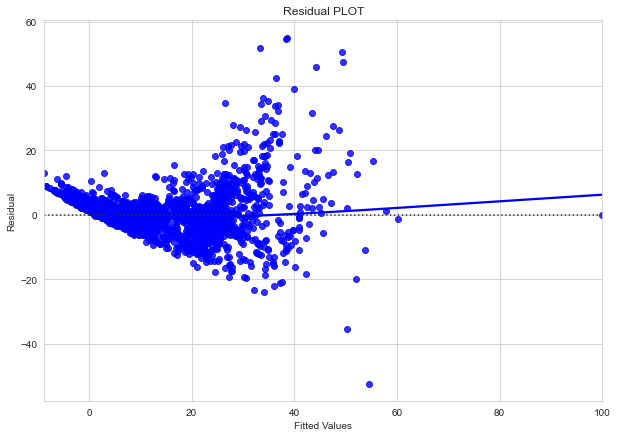

In [147]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.residplot(fitted,residual,color="blue",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

No discernable pattern appears in the residuals therefore linearity is satisfied

### Test for Normality

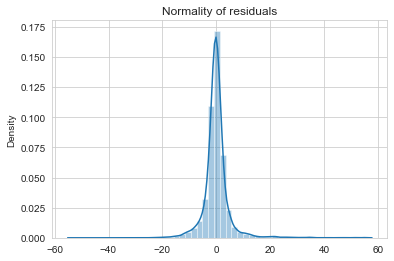

In [148]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

* Data appears sufficiently normal

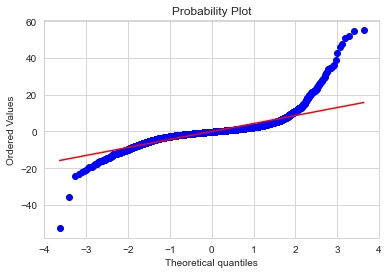

In [149]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [150]:
stats.shapiro(residual)

ShapiroResult(statistic=0.750529944896698, pvalue=0.0)

* Shapiro test returned a p-value < 0.05 which means we can reject the null hypothesis that the data is normal
* However, this can sometimes be sensitive to large data sets
* The QQ plot showed sufficient normality to proceed
* We could try to further trim outliers to increase normality in subsequent analyses

### TEST FOR HOMOSCEDASTICITY
* Test -goldfeldquandt test
* Null hypothesis : Residuals are homoscedastic
* Alternate hypothesis : Residuals have hetroscedasticity



In [151]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train3)
lzip(name, test)

[('F statistic', 0.8062392015333587), ('p-value', 0.9999999601646233)]

* Since p-value > 0.05 we can accept the null hupothesis that the residuals are homoscedastic.

# Prediction using Model

In [152]:
X_train3.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Seats', 'Power', 'Mileage',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Brand_Name_Audi', 'Brand_Name_BMW', 'Brand_Name_Bentley',
       'Brand_Name_Chevrolet', 'Brand_Name_Datsun', 'Brand_Name_Fiat',
       'Brand_Name_Force', 'Brand_Name_Ford', 'Brand_Name_Hindustan',
       'Brand_Name_Honda', 'Brand_Name_Hyundai', 'Brand_Name_Isuzu',
       'Brand_Name_Jaguar', 'Brand_Name_Jeep', 'Brand_Name_Lamborghini',
       'Brand_Name_Land', 'Brand_Name_Mahindra', 'Brand_Name_Maruti',
       'Brand_Name_Mercedes-Benz', 'Brand_Name_Mini', 'Brand_Name_Mitsubishi',
       'Brand_Name_Nissan', 'Brand_Name_OpelCorsa', 'Brand_Name_Porsche',
       'Brand_Name_

In [153]:
X_test_final = X_test[X_train3.columns]
X_test_final.head()

,const,Year,Kilometers_Driven,Seats,Power,Mileage,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Name_Nissan,Brand_Name_OpelCorsa,Brand_Name_Porsche,Brand_Name_Renault,Brand_Name_Skoda,Brand_Name_Smart,Brand_Name_Tata,Brand_Name_Toyota,Brand_Name_Volkswagen,Brand_Name_Volvo
2954,1.00,2016,30000,5.00,81.80,20.40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1635,1.00,2012,72000,5.00,167.70,18.33,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2624,1.00,2015,66337,5.00,70.00,24.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7051,1.00,2017,41200,5.00,88.50,28.09,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6735,1.00,2017,35000,5.00,88.50,24.30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
y_pred = olsres2.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE

In [155]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 5.005914199139903
Test error: 5.064738282570883


* The RMSE of both the traiing and test datasets have comparable error which means we have a model which can be used to predict car prices

In [156]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     368.2
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        23:39:44   Log-Likelihood:                -15375.
No. Observations:                5075   AIC:                         3.085e+04
Df Residuals:                    5026   BIC:                         3.117e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Observations

-  Now this is our final model we will provide observations

    - The year the car was made is a significant factor in determing price (0.7275 * year). Newer cars have higher prices.
    - The amount of Kilometers driven reduces value by small amount
    - Cars with more seats command higher prices in general with a coefficent of 0.4462
    - The amount of Power a vehicle has is small postive factor in price at 0.0840
    - Higher mileage cars have lower prices with a coefficient factor of -0.1584
    - The location of the vehicle can have a powerful impact on vehicle price. 
        - Bangalore has the most expensive cars at 1.62 * price followed by Coimbatore at 1.47 and Chenai at 1.35
        - Kolkata (-1.00), Dehli (-0.90) and Mumbai (-0.8382) had the biggest negative impact on price
    - Fuel Type can impact price. Petrol cars were cheaper at (-1.65) 
        - In contrast to Electric vehicles which command premium prices at + 8.67
    - Brand Name can also impact price with most Brands having a negative impact in price except for Lamborghini which can increase price by 14.7685 
        

# Optimize model using Forward Feature Selection

* Forward feature selection starts with an empty model and adds in variables one by one.**

In [157]:
X_train_new = X_train3.drop('const', axis = 1)

In [158]:
%pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

Note: you may need to restart the kernel to use updated packages.


In [159]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 51,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    0.8s finished

[2021-05-21 23:39:48] Features: 1/51 -- score: 0.5923244898368499[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished

[2021-05-21 23:39:49] Features: 2/51 -- score: 0.6551056823058726[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.9s finished

[2021-05-21 23:39:50] Features: 3/51 -- score: 0.6806233523720453[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [160]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [161]:
X_train_final = X_train3[X_train3.columns[feat_cols]]

In [162]:
X_test.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Engine', 'Seats',
       'Power', 'Mileage', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Brand_Name_Audi', 'Brand_Name_BMW',
       'Brand_Name_Bentley', 'Brand_Name_Chevrolet', 'Brand_Name_Datsun',
       'Brand_Name_Fiat', 'Brand_Name_Force', 'Brand_Name_Ford',
       'Brand_Name_Hindustan', 'Brand_Name_Honda', 'Brand_Name_Hyundai',
       'Brand_Name_Isuzu', 'Brand_Name_Jaguar', 'Brand_Name_Jeep',
       'Brand_Name_Lamborghini', 'Brand_Name_Land', 'Brand_Name_Mahindra',
       'Brand_Name_Maruti', 'Brand_Name_Mercedes-Benz', 'Brand_Name_Mini',
       'Brand_Name_Mitsubishi', 'Brand_Name_Nissan', 'Brand_Name_OpelCorsa',
       'Brand_Nam

In [163]:
X_test_final = X_test[X_train_final.columns]

In [164]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)       

Intercept of the linear equation: [-1460.06209264]

Coefficients of the equation are: [[-3.13015948e-11  7.27493960e-01 -2.44416513e-05  4.46191088e-01
   8.39625395e-02 -1.58376027e-01  1.62090853e+00  1.35726206e+00
   1.47069856e+00 -9.02723309e-01  1.26642141e+00  8.41292018e-01
  -1.71973555e-01 -1.00182684e+00 -8.38231730e-01  4.79269043e-01
  -1.27032002e-01  8.69813215e+00 -1.01154892e-01 -1.65604529e+00
   2.14640973e-01  5.95121206e+00  4.27417557e+00  2.60578430e+01
  -5.64750612e+00 -6.48753321e+00 -5.38250537e+00 -6.67837949e+00
  -3.99960830e+00 -5.26592103e-11 -5.18127998e+00 -4.46586259e+00
  -3.85254649e+00  1.17608050e+01 -2.35857450e+00  6.63255865e+01
   2.00069708e+01 -6.63416603e+00 -3.57534007e+00  6.59366387e+00
   1.07293078e+01 -3.73732405e+00 -4.43939178e+00  8.13048423e-01
   1.92105688e+01 -4.87754587e+00 -4.80119252e+00 -7.10542736e-15
  -5.55641370e+00 -2.31246393e+00 -5.08540745e+00]]


In [165]:
# R2 Squared: on train and test
print('R^2 score on train data :', r2_score(y_train, predicted))
print('R^2 score on test data :', r2_score(y_test, pred))

R^2 score on train data : 0.7786096133151159
R^2 score on test data : 0.7695084887537942


In [166]:
# RMSE on train and test data
print('RMSE on train data :', mean_squared_error(y_train, predicted)**0.5)
print('RMSE on test data :', mean_squared_error(y_test, pred)**0.5)

RMSE on train data : 5.005914199139902
RMSE on test data : 4.856888090346265


### Observations

- Both R^2 of 0.7695 and RMSE show that the model is a good fit
- The olsres2 model (R^2 = 0.776) and the model using mlxtend (R^2 = 0.7695) are approximately the same

# Business Recommendations

* Key Insight: Year of Manufacture has positive impact on price 

Recommendation: The company should look for late model vehicles manufactured in the last 2-3 years

* Key Insight -  The number of seats (i.e. car size) is positive determinant of price 

Recommendation: Look for larger vehicles to have higher resale values 

* Key Insight -  The location of the vehicle is the most powerful determining factor for prices

Recommendation: The company should look to acquire used vehicles in lower priced market such as Delhi and Kolkata and move them to higher priced market such as Bangalore, Chennai, and Mumbai 

* Key Insight -  Brand is not an important factor but electric vehicles have 8.7x higher resale prices

Recommendation: Create an electric vehicle strategy as they may offer the biggest future potential for growth 
